In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_colwidth=200
import plotly.express as px



In [2]:
df=pd.read_csv('hr.csv')

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
print(df.columns)
cols=df.columns.values.tolist()
print("TOTAL NUMBER OF COLUMNS IN THE DATASET ARE --   ",len(cols))

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
TOTAL NUMBER OF COLUMNS IN THE DATASET ARE --    35


WE CAN CLEARLY SEE THERE ARE 35 DISTINCT COLUMNS PRESENT IN THE DATASET

Attrition is our Label  and  other remaining columns are our features

CHECKING FOR NULLS IN THE DATASET

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

SINCE THERE ARE NO NULLS AS OF NOW WE CAN SAY THAT OUR DATASET IS HEALTHY IN TERMS OF NULLS 

CHECKING THE TYPE OF DATA

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

DATASET CONTAINS MIXED DATATYPES OF BOTH INTEGERS AND OBJECTS

DESCRIBING THE CONTINUOUS COLUMNS/FEATURES

In [7]:
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

BY JUST LOOKING AT THE ABOVE DESCRIPTION WE CAN OBSERVE THESE FOLLOWING POINTS-<BR><br>
    EmployeeNumber have a proper distribution (count-1470 and maximum-(2068) ) and not just sequence so can not be ignored as it may hold some information which is necessary for the prediction <br><br>
    AGE seems perfectly distributed as maximum is 60 which is retirement age in most countries<br><br>
    StandardHours is same for all the employees irrespective of job role and other factors<br><br>
    EmployeeCount is 1 for all meaning the row contains data for individual employee and not the groups<br><br>
    YearsWithLastPromotion,YearsWithCurrentManager,YearsCurrentRole might have outliers as maximum is too away from mean value<br><br>
    Further Observations will be from plots/graphs about the data<br><br>
    
    
                                                                                                               
    
    


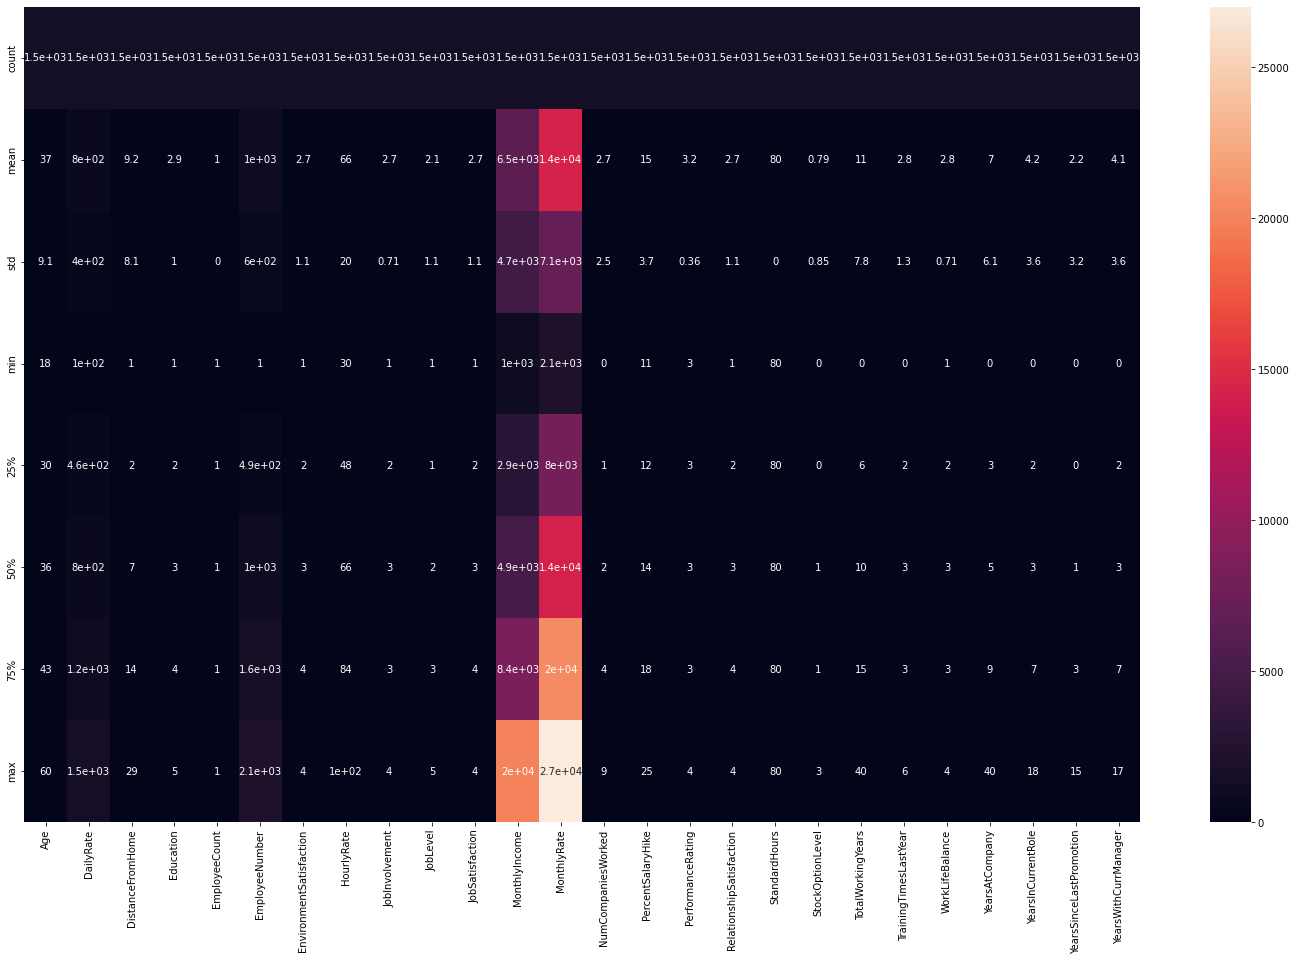

In [8]:
plt.figure(figsize=(25,15))
sns.heatmap(df.describe(),annot=True,annot_kws={'size':10})
plt.show()

HEATMAP FOR THE CONTINUOUS DATA

---------------------------------Label analysis--------------------------------------------------------

In [9]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

THERE ARE 2 UNIQUE VALUES IN OUR LABEL DATASET<BR><br>
AND DATASET IS IMBALANCED WHICH WE HAVE TO BALANCE USING SMOTE<BR>


-------------------------------------------------------------------------------------------------------------------------

making list for categorical_columns ,cat_col <br><br>
making list for continuous_columns,cont_col<br><br>
making list of all columns,lis<br><br>

In [11]:
#list of all columns
lis=df.columns.values.tolist()

In [12]:
cat_col=[]
cont_col=[]

In [13]:
#for loop iterate over each column and check the dtype append cont_col if its a continuous variable and append cat_col if its a categorical data
for i in lis:
    if(df[i].dtypes=='object'):
        cat_col.append(i)
    else:
        cont_col.append(i)

MAKING A DATAFRAME FOR DETERMINING UNIQUENESS/UNIQUE_SUB_CATEGORIES IN EACH CATEGORICAL COLUMN

In [14]:
FEATURE=[]
UNIQUE_SUBCATEGORIES=[]
TOTAL_UNIQUE_SUBCATEGORIES=[]
SUBFEATURE_PERC=[]
UNIQUENESS_PERCENT=[]

In [15]:
for i in cat_col:
    sc=df[i].unique()
    up=round((1/len(sc))*100,2)
    res=[[df[i].unique()[j],f'{round((df[i].value_counts()[j]/1470)*100,2)}%'] for j in range (len(df[i].unique()))]
    FEATURE.append(i)
    UNIQUE_SUBCATEGORIES.append(sc)
    TOTAL_UNIQUE_SUBCATEGORIES.append(len(sc))
    SUBFEATURE_PERC.append(res)
    UNIQUENESS_PERCENT.append(up)

In [16]:
info=pd.DataFrame({'FEATURES':FEATURE,'UNIQUE_SUBCATEGORIES':UNIQUE_SUBCATEGORIES,'TOTAL_UNIQUE_SUBCATEGORIES':TOTAL_UNIQUE_SUBCATEGORIES,'SUBCATEGORIES AND RESPECTIVE PERCENTAGES':SUBFEATURE_PERC,'UNIQUENESS_PERCENT':UNIQUENESS_PERCENT})

In [17]:
info

FEATURES  \
0       Attrition   
1  BusinessTravel   
2      Department   
3  EducationField   
4          Gender   
5         JobRole   
6   MaritalStatus   
7          Over18   
8        OverTime   

                                                                                                                                                                 UNIQUE_SUBCATEGORIES  \
0                                                                                                                                                                           [Yes, No]   
1                                                                                                                                      [Travel_Rarely, Travel_Frequently, Non-Travel]   
2                                                                                                                                    [Sales, Research & Development, Human Resources]   
3                                                                                                       [Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources]   
4                                                                                                                                                                      [Female, Male]   
5  [Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources]   
6                                                                                                                                                         [Single, Married, Divorced]   
7                                                                                                                                                                                 [Y]   
8                                                                                                                                                                           [Yes, No]   

   TOTAL_UNIQUE_SUBCATEGORIES  \
0                           2   
1                           3   
2                           3   
3                           6   
4                           2   
5                           9   
6                           3   
7                           1   
8                           2   

                                                                                                                                                                  SUBCATEGORIES AND RESPECTIVE PERCENTAGES  \
0                                                                                                                                                                            [[Yes, 83.88%], [No, 16.12%]]   
1                                                                                                                              [[Travel_Rarely, 70.95%], [Travel_Frequently, 18.84%], [Non-Travel, 10.2%]]   
2                                                                                                                            [[Sales, 65.37%], [Research & Development, 30.34%], [Human Resources, 4.29%]]   
3                                                                   [[Life Sciences, 41.22%], [Other, 31.56%], [Medical, 10.82%], [Marketing, 8.98%], [Technical Degree, 5.58%], [Human Resources, 1.84%]]   
4                                                                                                                                                                         [[Female, 60.0%], [Male, 40.0%]]   
5  [[Sales Executive, 22.18%], [Research Scientist, 19.86%], [Laboratory Technician, 17.62%], [Manufacturing Director, 9.86%], [Healthcare Representative, 8.91%], [Manager, 6.94%], [Sales Representat...   
6                                                                                                                                                [[Single, 45.78%], [Married, 

Observations from the dataframe
----------------------


ABOVE DATAFRAME DEPICTS FEATURES,UNIQUE_SUBCATEGORIES AND PERCENT IN THEM<BR>
    OBSERVATIONS:
    ALL THE EMPLOYEES ARE ABOVE 18<BR><br>
    ATTRIRTION HAVE 2 UNIQUE SUB FEATURES-[YES,NO]<br><br>
    MAXIMUM SUBFEATURES ARE PRESENT IN jobrole(9)<br><br>
    Attrition is highly imbalanced as 83.88% are yes and ony 16.12 % are no<br><br>
    in Business Travel [Travel_rarely] have a very high percentage as compared to those who travel frequently and non travellers
    Gender ratio is 60%(Female)-40%(Male<br><br>
    Sales Excutive contributes the highest workforce(22.18%)<br><br>
    71 % Are subjected to overtime which is significantly greater than non OverTimers (28.3%)


plotting the  correlation matrix of continuous data with the label

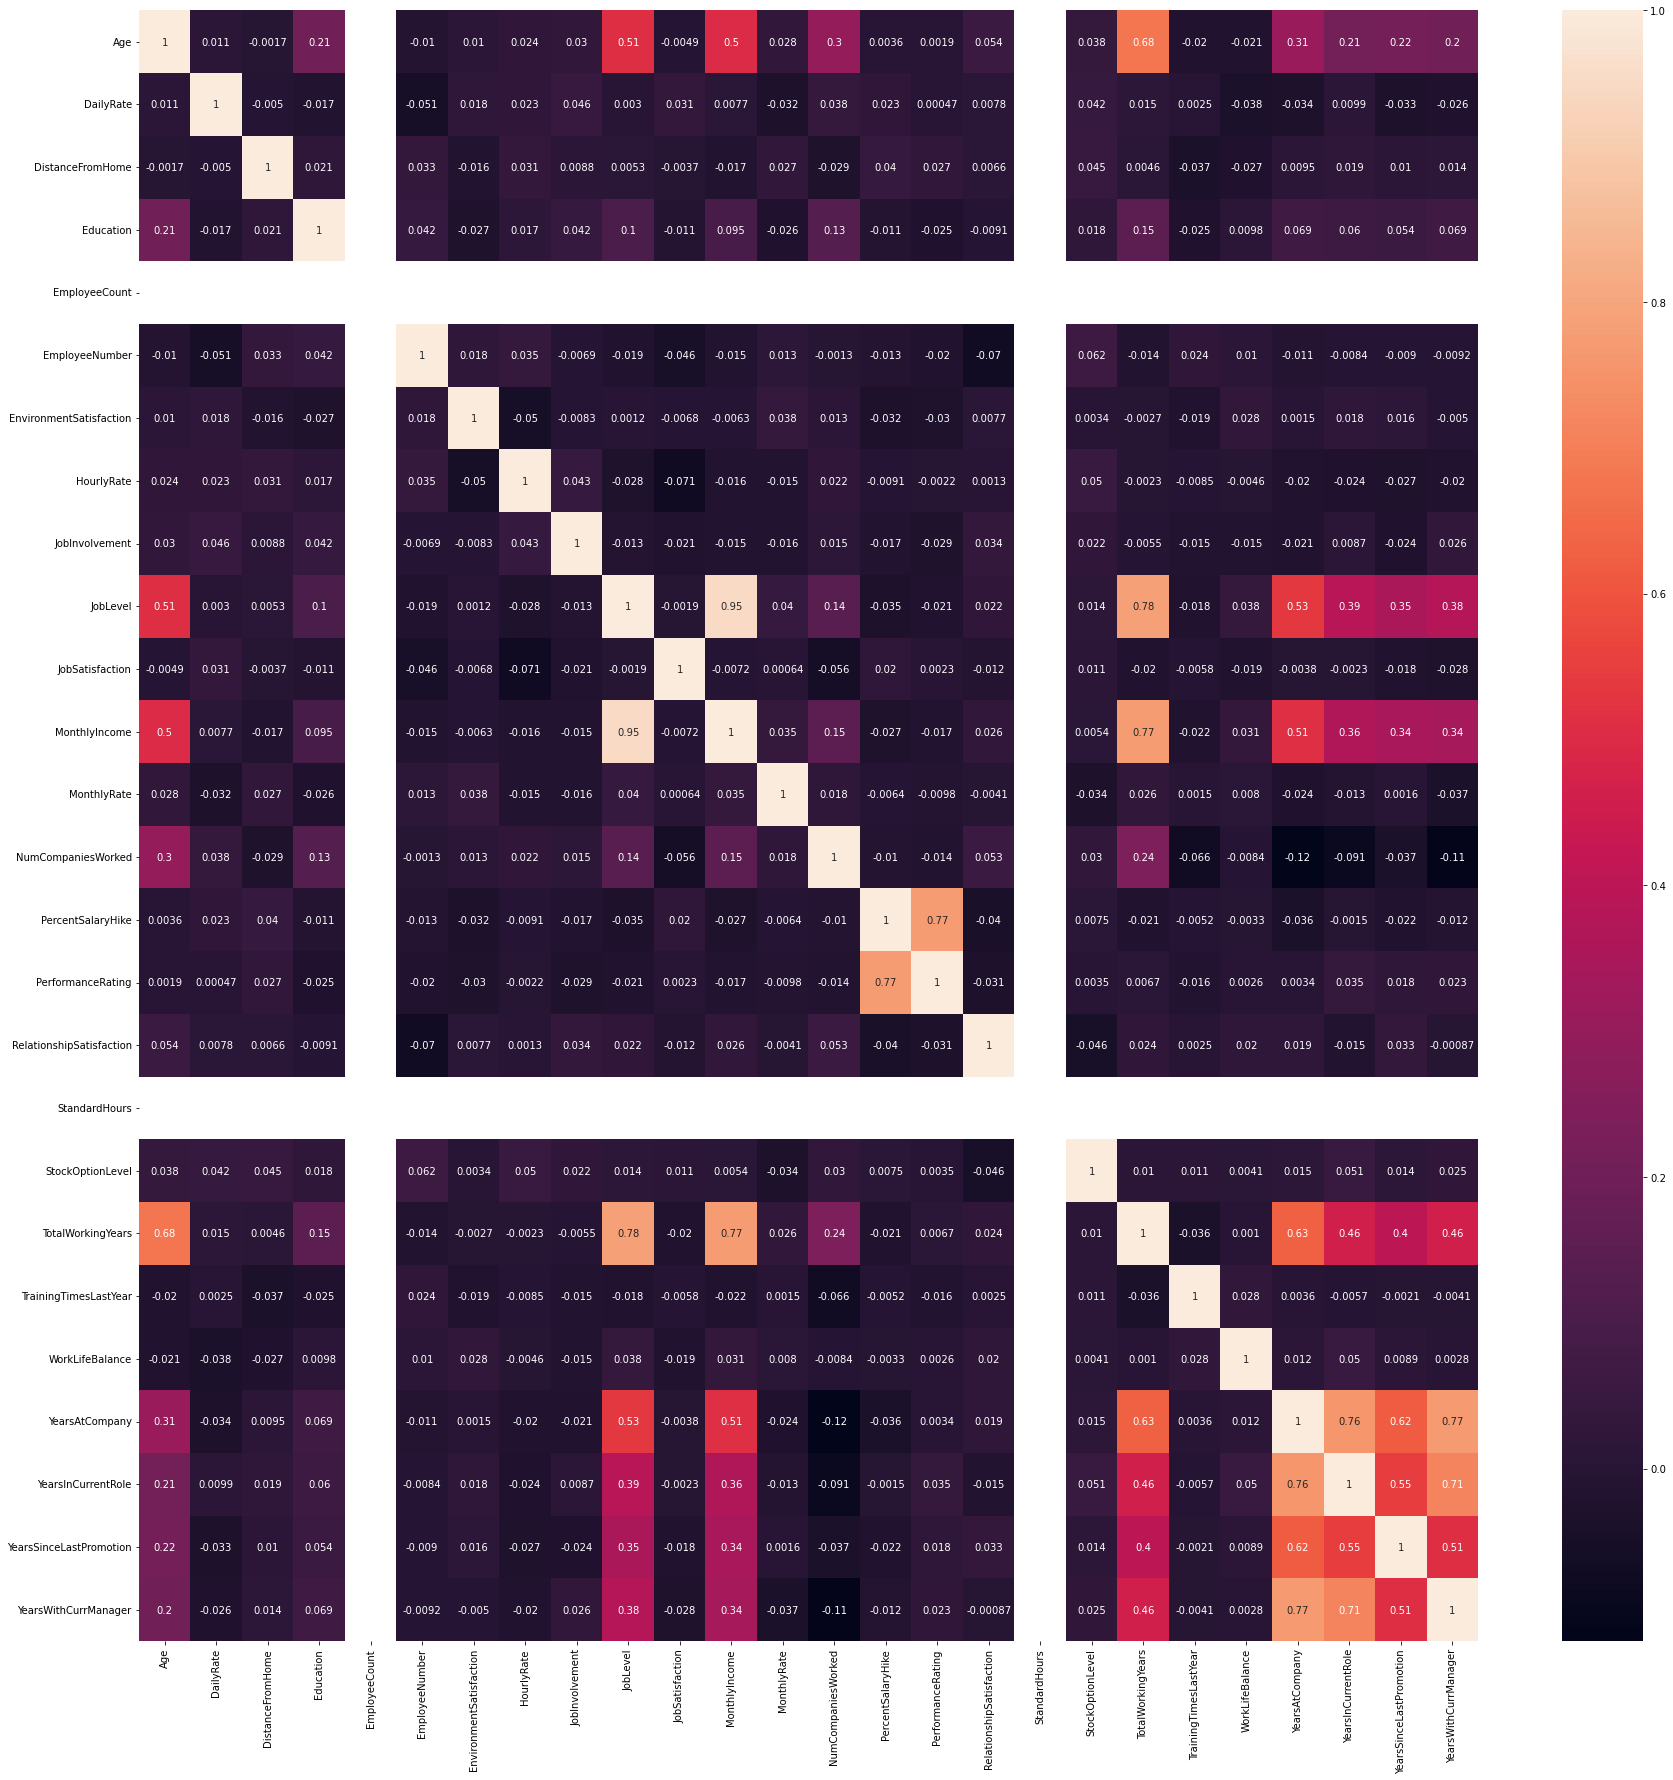

In [18]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})
plt.show()

JobLevel and MonthlyIncome are highly correlated to each other with a correlation of 0.95 and maybe leading to multi-collinearity problems which will be taken care in further steps<br><br>
JobLevel and TotalWorkingYears are highly correlated to each other(0.77)<br><br>

RelationshipSatisfaction and YearsWithCurr manager have very small correlation and can be ignored<br><br>
EmployeeNumber have not more than 7 percent of correlation with any feature and maximum with ReltionshipSatisfaction a negative correlation of(-7%) <br><br>


In [19]:
df.shape

(1470, 35)

DROPPING STANDARDHOURS,EMPLOYEECOUNT AS THEY ARE CONSTANTS AND WONT EFFECT THE PREDICTIONS MUCH<br>
DROPPING OVER 18 AS ALL OF THE EMPLOYEES ARE OVER 18<BR>

In [20]:
df.drop(['EmployeeCount','StandardHours'],axis=1,inplace=True)

PLOTS DESCRIBING THE RELATIONSHIP AMONG THE FEATAURES AND OF THE FEATURES WITH THE LABELS

In [21]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 20)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 20)

RELATIONSHOP AMONG CATEGORICAL DATA 
--------------------------------------------------

IMPACT  OF BusinessTravel WITH DIFFERENT FEATURES AND LABELS 
-----------------------

In [22]:
cat_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

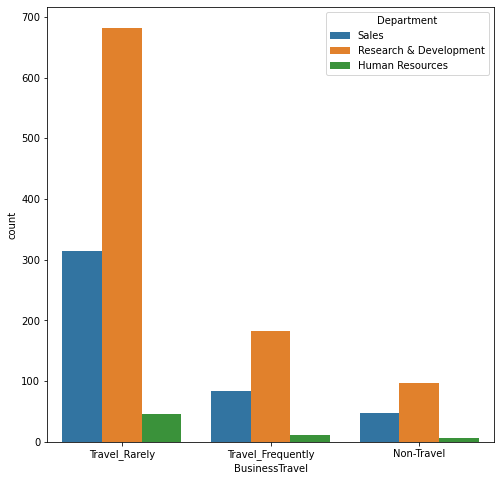

In [23]:
plt.figure(figsize=(8,8))
a=sns.countplot(x=df['BusinessTravel'],hue=df['Department'])
plt.show()

AS WE CAN SEEN THAT MAJORITY  OF THE EMPLOYEES TRAVEL VERY RARELY IN THE COMPANY<br>
AMONG THOSE WHO TRAVEL RESEARCH AND DEVELOPMENT PEOPLE ARE OUGHT TO TRAVEL MORE<BR>
    HUMAN RESOURCE PEOPLE ARE NOT TRAVELLING MUCH<br>
    fixed pattern in all the three categories RandD >Sales>Human Resources <br>


THOSE WHO TRAVEL VERY RARELY ARE SOUGHT TO  REMAIN IN THE COMPANY AS THE COUNT IS VERY HIGH<BR>


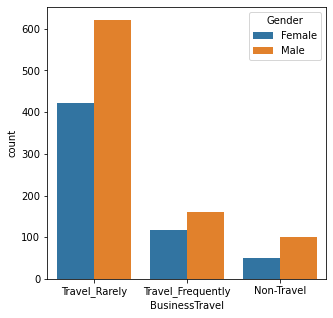

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['BusinessTravel'],hue=df['Gender'])
plt.show()

Among both the genders males are relatively travelling more as comapred to females in all the three categories

IMPACT OF GENDER ON ATTRITION
-----------------

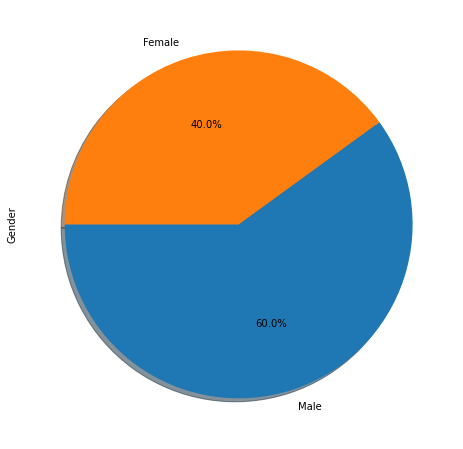

In [25]:
plt.figure(figsize=(8,8))
df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,startangle=180)
plt.show()

60% of the employees are male and 40% are female <br>


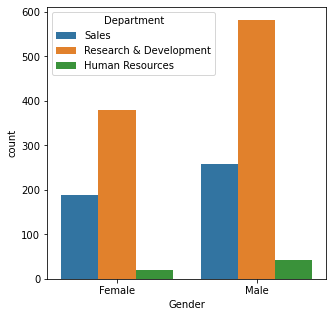

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Gender'],hue=df['Department'])
plt.show()

Males are dominating when it comes to numbers in sales,human resources and Research and development<br>



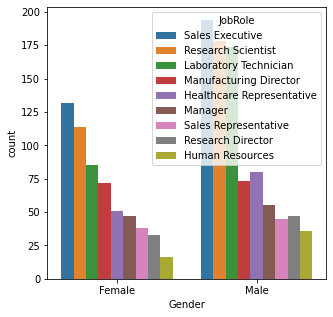

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Gender'],hue=df['JobRole'])
plt.show()

This plot shows the distribution of females and males in different jobroles<br>


IMPACT OF JOB ROLE ON DIFFERENT FEATURES AND LABEL
--------------------

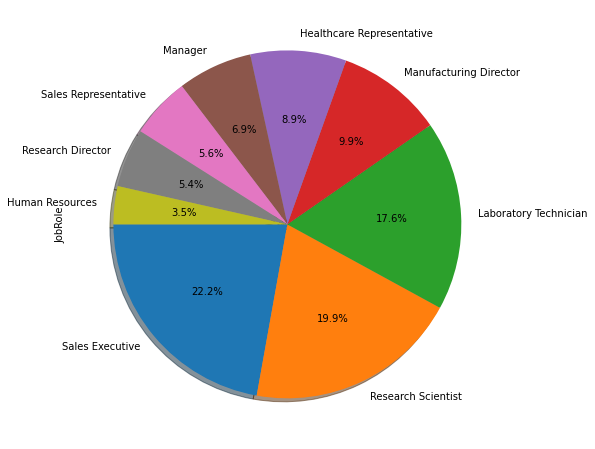

In [28]:
plt.figure(figsize=(8,8))
df['JobRole'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,startangle=180)
plt.show()

SALES EXECUTIVE CONSTITUTES THE MAJORITY OF THE WORKFORCE<BR><br>
RESEARCH SCIENTISTS comes second in the list<br><br>
    Human resource constitutes only 3.5 % of the workforce becoming the least of all
    

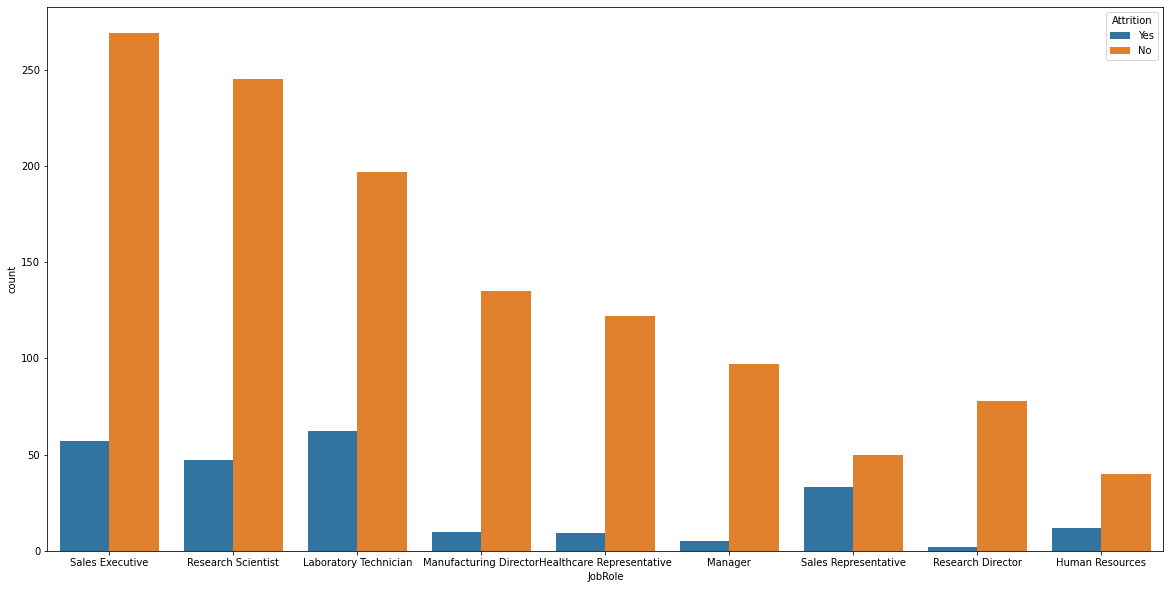

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['JobRole'],hue=df['Attrition'])
plt.show()

Plot describing the attrition in various departments <br>
Laboratory Technicians are having the highest attrition rates when comapared to others<br>
Higher Positions like Managers and Research Directors are having the least attrition<br>





IMPACT OF EDUCATION FIELD ON DIFFERENT FEATURES AND LABEL
----------------------

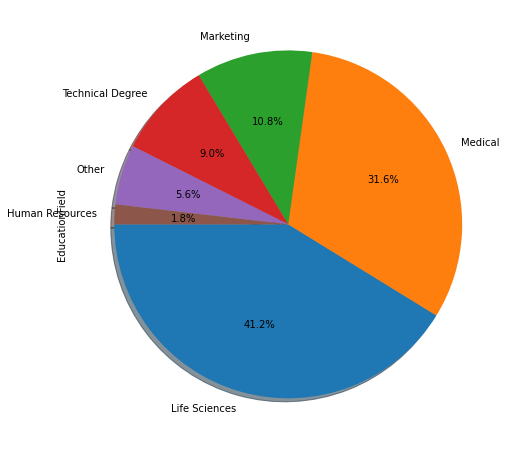

In [30]:
plt.figure(figsize=(8,8))
df['EducationField'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,startangle=180)
plt.show()

THOSE WHO  HAVE A QUALIFICATION IN LIFE SCIENCES constitutes 41.2% of the workforce<br>
Medical Sciences as the qualification also constitute about 31.6% of the workforce whcih is second as in count after Life Sciences<br>
HumanResources as the qualificaton were opted by only 1.8% of the employees and they too must be in the human resource department<br>



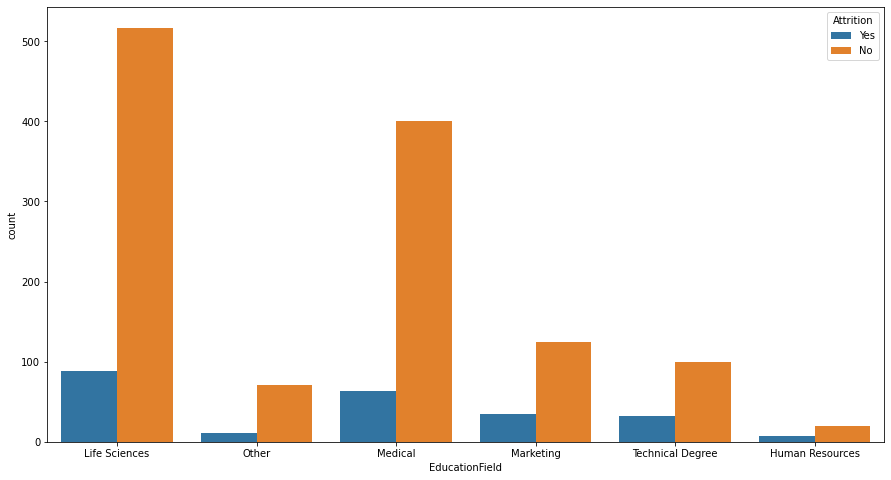

In [31]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['EducationField'],hue=df['Attrition'])
plt.show()

plot describing attrition rates of employees with different EducationFields<br>


RELATIONSHIP BETWEEN CONTINUOUS AND CATEGORICAL DATA<BR>
 -----------------------

In [32]:
cont_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

LETS CHECK HOW AGE IS RELATED TO LABEL AND OTHER FEATURES
---------------------

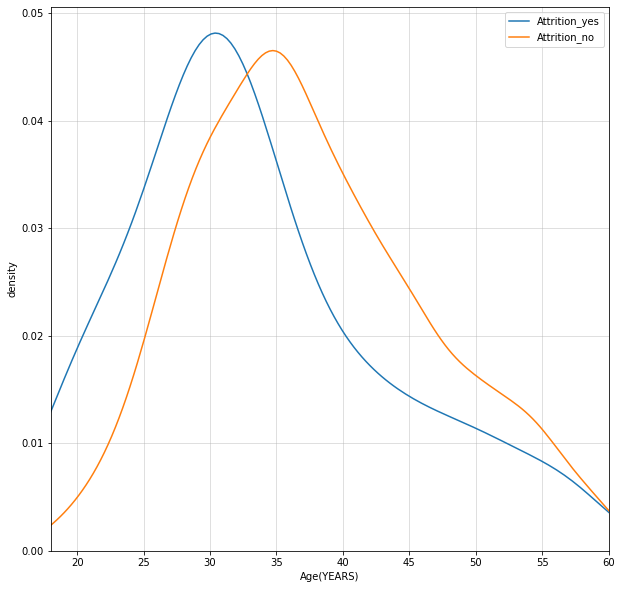

In [33]:
plt.figure(figsize=(10,10))
plt.grid(True,alpha=0.5)
sns.kdeplot(df.loc[df['Attrition']=='Yes','Age'],label='Attrition_yes')
sns.kdeplot(df.loc[df['Attrition']=='No','Age'],label='Attrition_no')
plt.xlim(18,60)
plt.xlabel('Age(YEARS)')
plt.ylabel('density')
plt.legend()
plt.show()


ITS EASILY VISBLE THAT THOSE LYING IN AGE CATEGORY BETWEEN 30-35 YEARS ARE having high chances of attrition as density is at its peak<br>
after 40 years of age there is a gradual decrease in attrition as employees may be considering some future plans and stability in the later years<br>
EVEN YOUNG EMPLOYEES FROM 18 TO 25 SHOW A SIGNIFICANT RISE IN ATTRITIONS<BR>
    


In [34]:
temp = df.groupby(['BusinessTravel']).mean()
temp['BusinessTravel'] = temp.index
fig = px.bar(temp,x='BusinessTravel',y='Age', 
             color = 'Age', 
             title = "Age vs Business Travel", 
             labels = {'Age': 'Age (in years)'},
             color_continuous_scale = 'Magma_r')
fig.show()



IT CAN BE CLEARLY SEEN THAT THOSE HAVING AGE GREATER THAN 37-40 YEARS TRAVEL RARELY<BR>
YOUNG EMPLOYEE TRAVEL MORE FREQUENTLY<BR>
MIDDLE AGED EMPLOYEES ARE NON TRAVELLERS

In [35]:
temp = df.groupby(['JobRole']).mean()
temp['JobRole'] = temp.index
fig = px.bar(temp,x='JobRole',y='Age', 
             color = 'Age', 
             title = "Age vs JobRole", 
             labels = {'Age': 'Age (in years)'},
             color_continuous_scale = 'Magma_r')
fig.show()


AS PER AGE IN YEARS MOSTLY MANAGERS ARE ABOVE 45 YEARS OF AGE<BR>
SALES REPRESENTATIVES ARE MOSTLY YOUNGEST IN ALL CATEGORIES<BR>
THEN THEIR IS KIND OF EQUAL SPREAD IN TERMS OF AGE IN ALL DEPARTMENTS<BR>

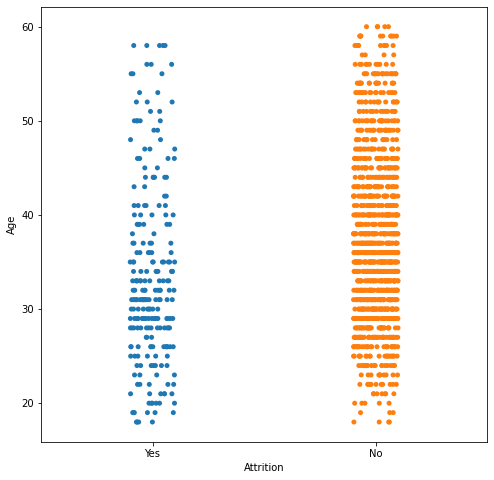

In [36]:
plt.figure(figsize=(8,8))
sns.stripplot(y=df['Age'],x=df['Attrition'])
plt.show()

Strip plot also concludes the same point that as the age of the employee increases chances of attrition decrases<br>


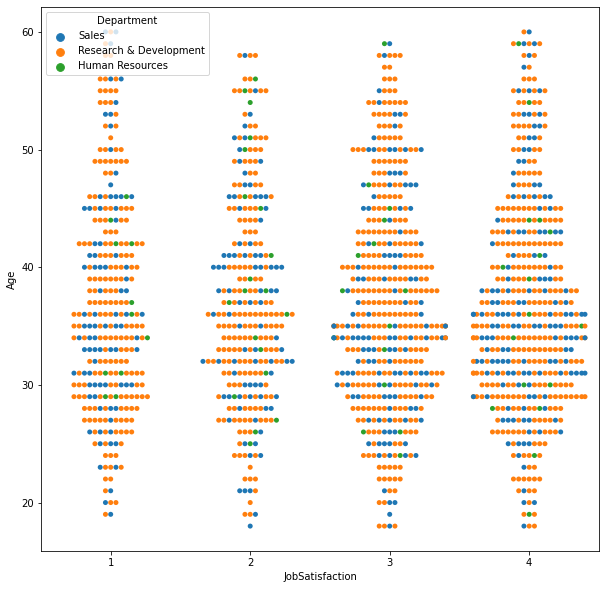

In [37]:
plt.figure(figsize=(10,10))
sns.swarmplot(x=df['JobSatisfaction'],y=df['Age'],hue=df['Department'])
plt.show()

Low age groups tend to be less satified as depicted by the plots can be one of the reasons for the high attrition rates<br>
middle ages from 28 to 40 denses in the job satisfaction level 3 and 4 consitituting a good percentage of employees<br>


ANALYSIS ON DISTANCE FROM HOME FEATURE<BR>
 -------------------------------



Minmum distance from home

In [38]:
min(df['DistanceFromHome'])

1

Mximum Distance from home 

In [39]:
max(df['DistanceFromHome'])

29

So there is range of 1 to 29 units which will we will be using in kde plot

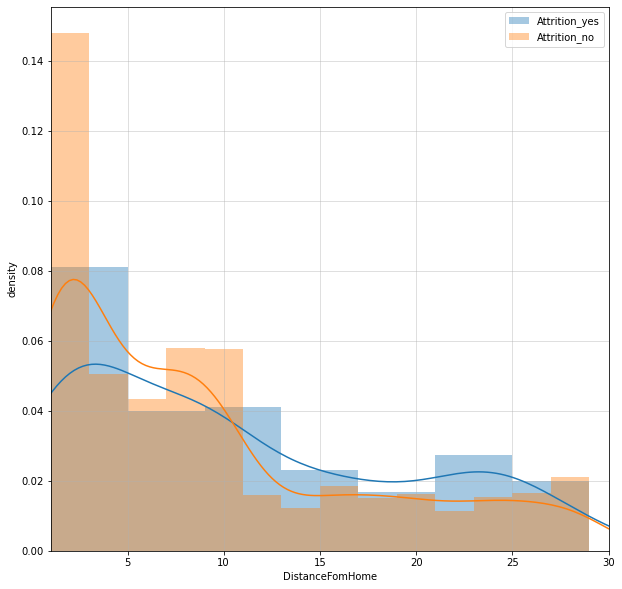

In [40]:
plt.figure(figsize=(10,10))
plt.grid(True,alpha=0.5)
sns.distplot(df.loc[df['Attrition']=='Yes','DistanceFromHome'],label='Attrition_yes')
sns.distplot(df.loc[df['Attrition']=='No','DistanceFromHome'],label='Attrition_no')
plt.xlim(1,30)
plt.xlabel('DistanceFomHome')
plt.ylabel('density')
plt.legend()
plt.show()

Density of employee living near office is quiet significant<br>
Surprisinigly people quit the job also were living near the office which depicts it might not be that important determining the attrition

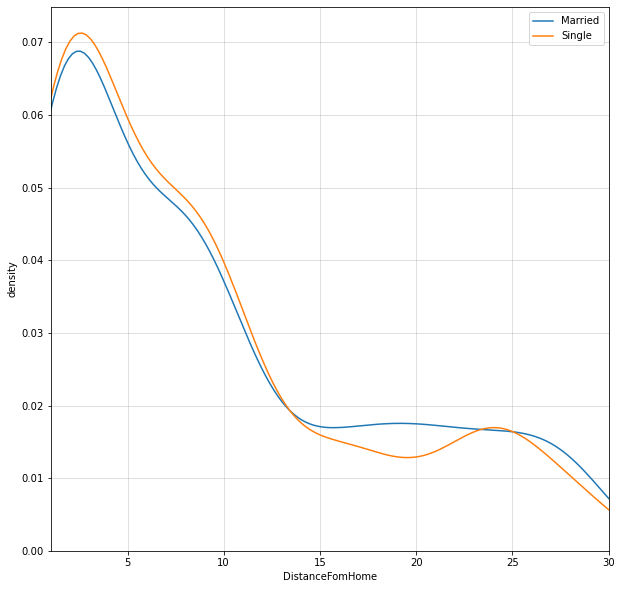

In [41]:
plt.figure(figsize=(10,10))
plt.grid(True,alpha=0.5)
sns.kdeplot(df.loc[df['MaritalStatus']=='Married','DistanceFromHome'],label='Married')
sns.kdeplot(df.loc[df['MaritalStatus']=='Single','DistanceFromHome'],label='Single')
plt.xlim(1,30)
plt.xlabel('DistanceFomHome')
plt.ylabel('density')
plt.legend()
plt.show()

As the distance from office increases number of employees decreses in both cases wheter married or single<br>
Maritial Status dose not  have much impact on  pattern of distribution of employees<br>

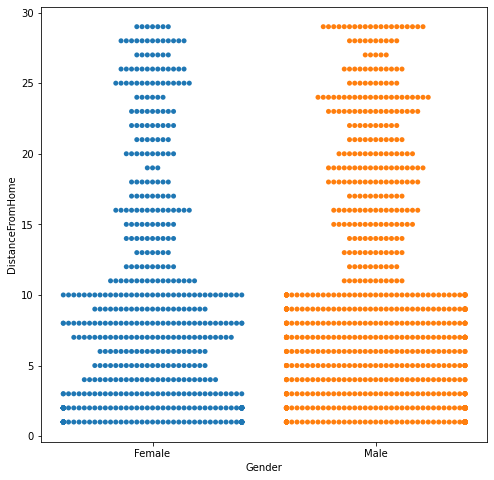

In [42]:
plt.figure(figsize=(8,8))
sns.swarmplot(x=df['Gender'],y=df['DistanceFromHome'])
plt.show()

There arerelatively less female employee living away from office as compared to male employess

Analysis for EDUCATION BACKGROUND

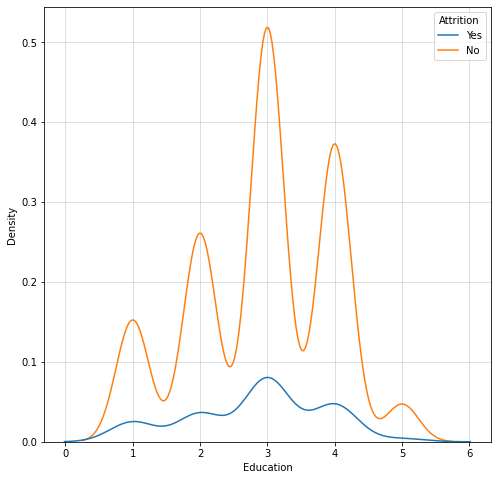

In [43]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.kdeplot(df['Education'],hue=df['Attrition'])
plt.show()

As the level in education increases from 1 to 3 we can observe that attrition rates also increases which gradually fall down too after 3<br>
Maximum employee have a education level of 3


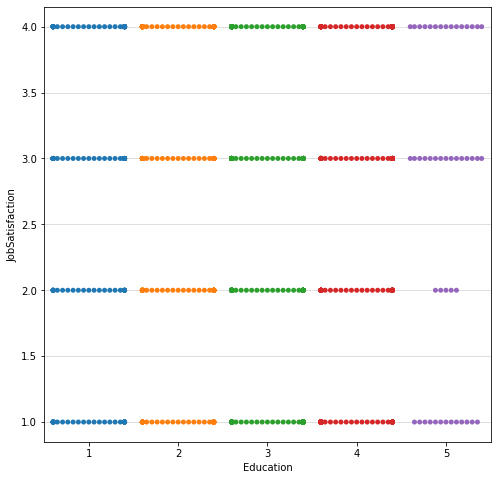

In [44]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.swarmplot(x=df['Education'],y=df['JobSatisfaction'])
plt.show()

Impact of environment satisfaction
------------------------

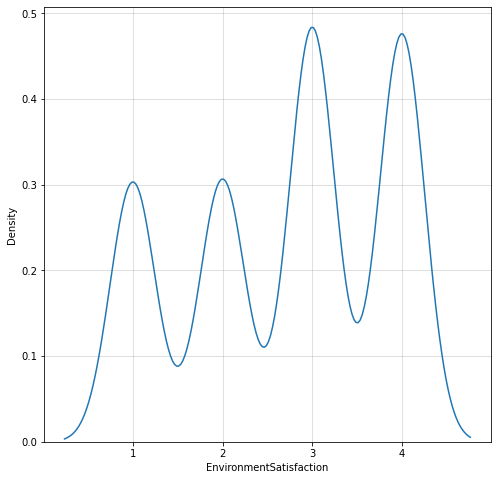

In [45]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.kdeplot(x=df['EnvironmentSatisfaction'])
plt.show()

Ditribution of various levels of EnviromentSatisfaction

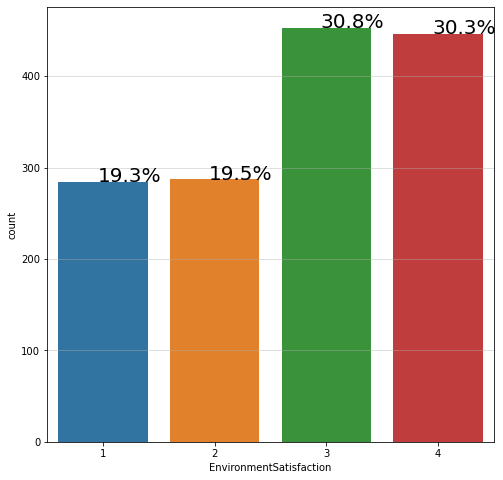

In [46]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
a=sns.countplot(x=df['EnvironmentSatisfaction'])
without_hue(a,df['EnvironmentSatisfaction'])
plt.show()

Almost 61 % of the employees are satisfied in levels of 3 & 4 <br>
Which constitutes a majority

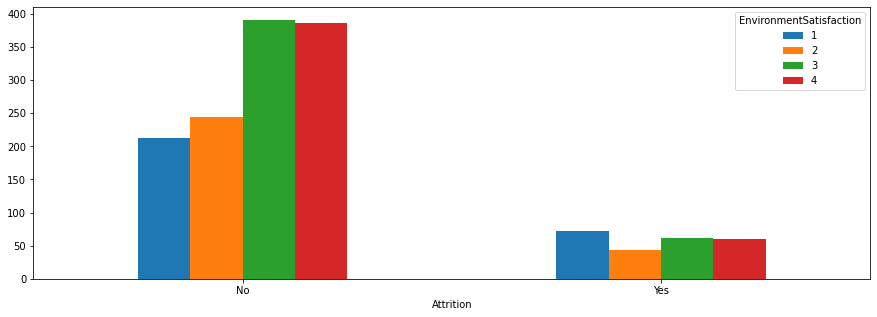

In [47]:
pd.crosstab(df['Attrition'], [df['EnvironmentSatisfaction']]).plot(kind="bar", figsize=(15, 5))
plt.xticks(rotation=0);

those who not switch or quit the company have relatively higher counts showing environment satisfaction is one of the key feature in attrinition<br>
Though the count of those who attrinate due to Environment satisfaction is low but not negligible<br>
almost those who attrinate have eqaul count in all levels of EnvironmentSatisfaction<br>



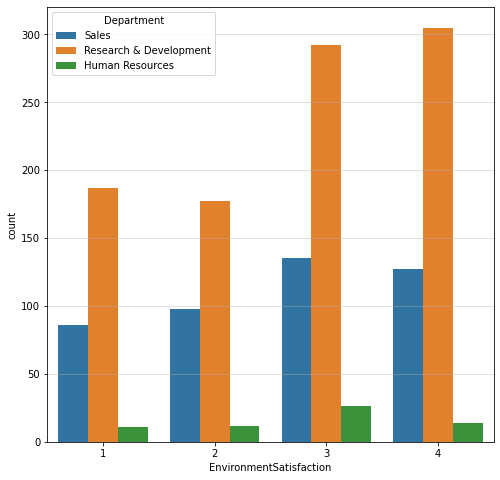

In [48]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.countplot(x=df['EnvironmentSatisfaction'],hue=df['Department'])
plt.show()

Research and Development and sales departments have almost equal number of employees who are satisfied  in levels of 3 and 4<br>


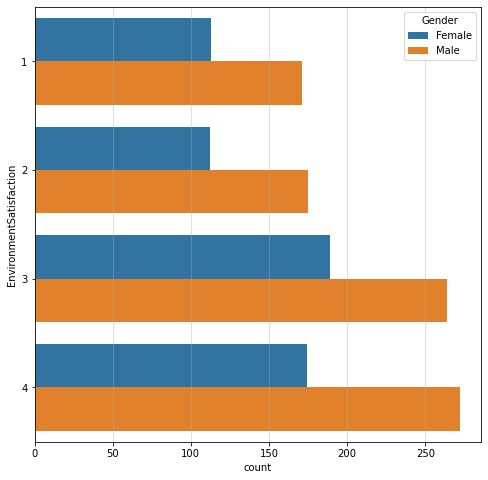

In [49]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.countplot(y=df['EnvironmentSatisfaction'],hue=df['Gender'])
plt.show()

Males have sightly higher counts in all levels of EnvironmenatSatisfaction 

Impact on JobInvolvement
-------------------------


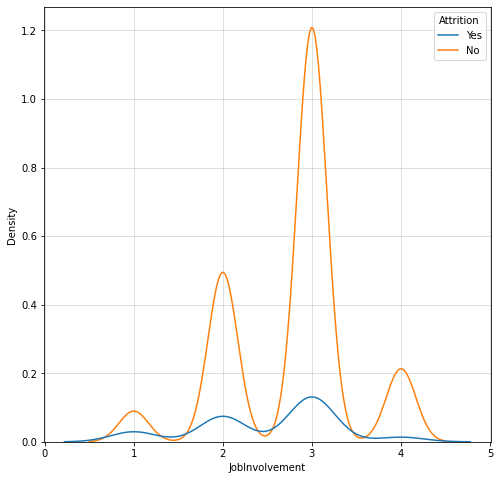

In [50]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.kdeplot(x=df['JobInvolvement'],hue=df['Attrition'])
plt.show()

With highest involvement of level 4 it can be easily observed that attrition have dropped significantly showing it as  a majore role in attrition

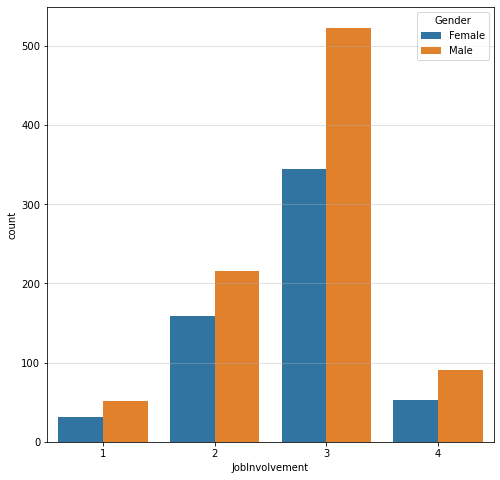

In [51]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.countplot(x=df['JobInvolvement'],hue=df['Gender'])
plt.show()

Males are sought to be more involved in a a job as compared to females<br>


In [52]:
temp = df.groupby(['JobInvolvement']).mean()
temp['JobInvolvement'] = temp.index
fig = px.bar(temp,x='JobInvolvement',y='Age', 
             color = 'Age', 
             title = "Age vs JobInvolvement", 
             labels = {'Age': 'Age (in years)'},
             color_continuous_scale = 'Magma_r')
fig.show()


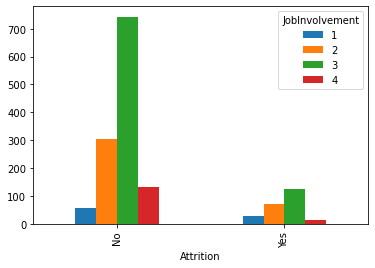

In [53]:
pd.crosstab(df['Attrition'],[df['JobInvolvement']]).plot(kind='bar')
plt.show()

as the job involvement increases the count of people not leaving the job increases<br>


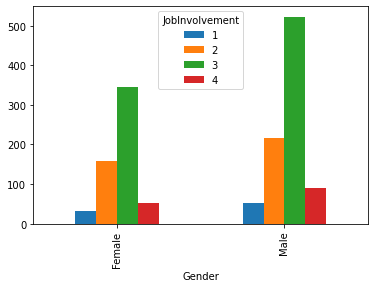

In [54]:
pd.crosstab(df['Gender'],[df['JobInvolvement']]).plot(kind='bar')
plt.show()

Impact Of Job Level on the features and the labels<br>
------------------------

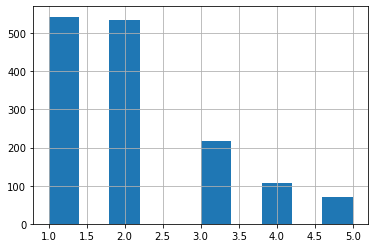

In [55]:
df['JobLevel'].hist()
plt.show()

Employee on the job level 1 and 2 are more in count<br>
as the job level increases count of employee decreses implying less number of employee at the top of the chain<br>


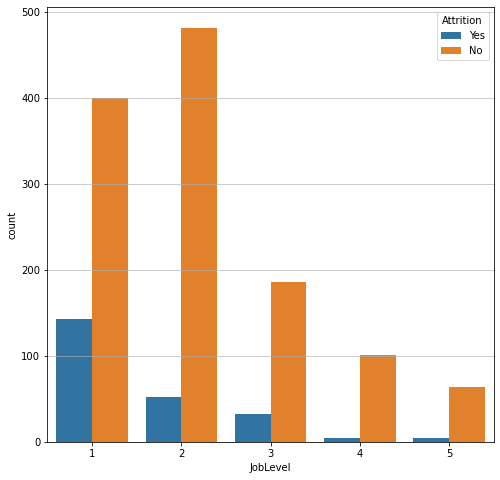

In [56]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.8)
sns.countplot(x=df['JobLevel'],hue=df['Attrition'])
plt.show()

As the job level increases attrition rates decreses gradually determining a close correlation between joblevel and attrition

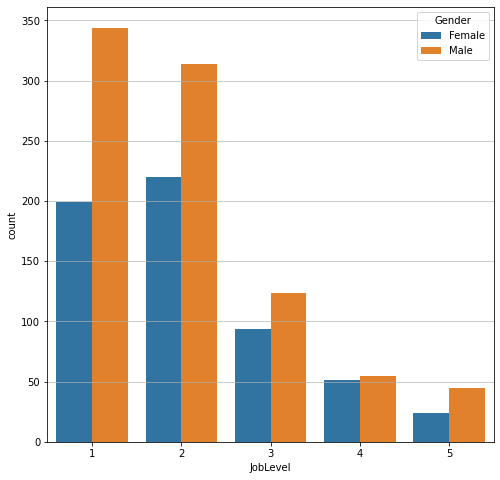

In [57]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.8)
sns.countplot(x=df['JobLevel'],hue=df['Gender'])
plt.show()

At higher job levels job level 4 and 5  both feamle and male are having equal count determining a good sex ratio in top levels<br>

Impact of JobSatifaction
------------

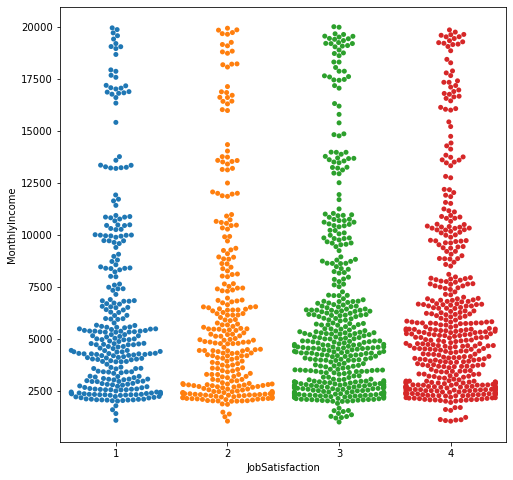

In [58]:
plt.figure(figsize=(8,8))
sns.swarmplot(x=df['JobSatisfaction'],y=df['MonthlyIncome'])
plt.show()

Those who are paid High are having higher job satifaction <br>


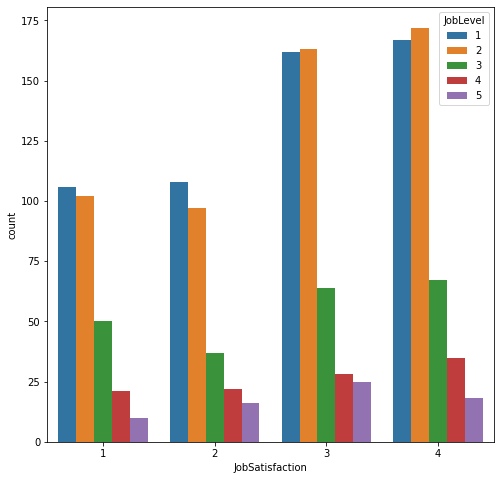

In [59]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['JobSatisfaction'],hue=df['JobLevel'])
plt.show()

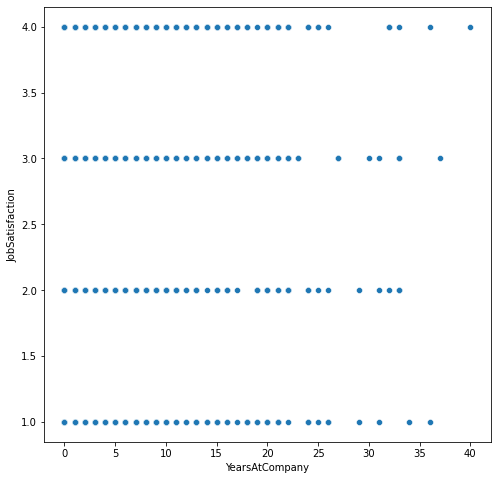

In [60]:
plt.figure(figsize=(8,8))
sns.scatterplot(y=df['JobSatisfaction'],x=df['YearsAtCompany'])
plt.show()

high level of satisfactions bring employee staying at the same comapny for more years<br>

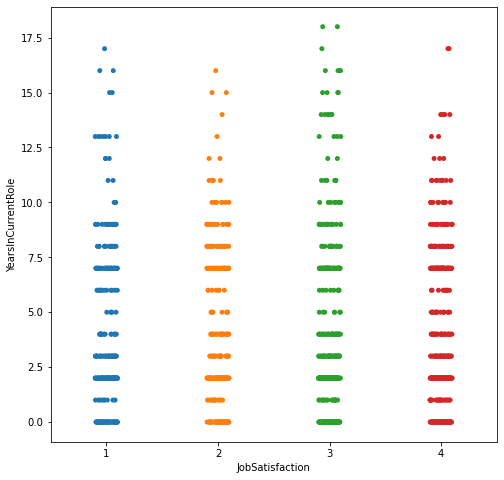

In [61]:
plt.figure(figsize=(8,8))
sns.stripplot(x=df['JobSatisfaction'],y=df['YearsInCurrentRole'])
plt.show()

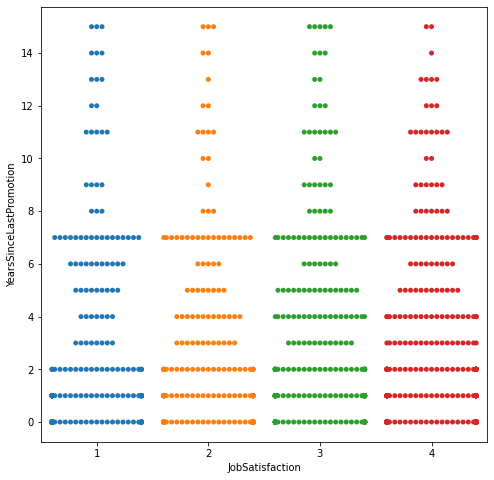

In [62]:
plt.figure(figsize=(8,8))
sns.swarmplot(x=df['JobSatisfaction'],y=df['YearsSinceLastPromotion'])
plt.show()

It can be seen that as the Years since last promotion increases there is shift towards lower job satification levels depicting promotion as one of the key feature in satisfication

Impact with Monthly Income
--------------------------

Minimum salary among the emoloyees

In [63]:
min(df['MonthlyIncome'])

1009

Maximum salary among the emoloyees

In [64]:
max(df['MonthlyIncome'])

19999

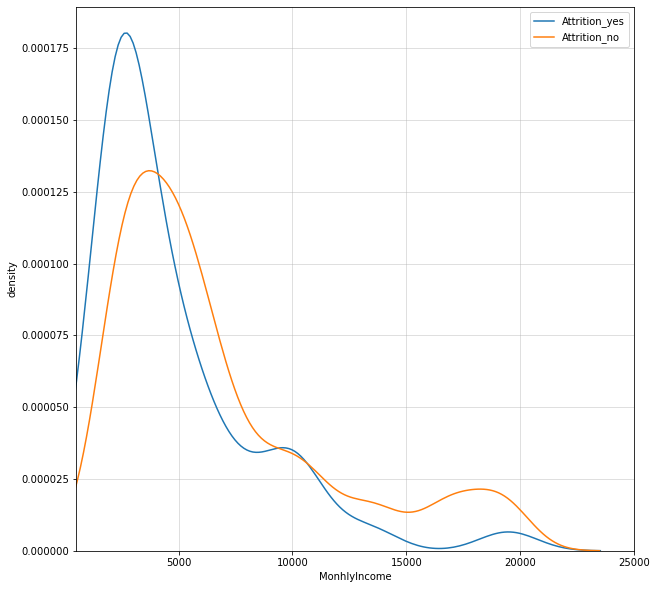

In [65]:
plt.figure(figsize=(10,10))
plt.grid(True,alpha=0.5)
sns.kdeplot(df.loc[df['Attrition']=='Yes','MonthlyIncome'],label='Attrition_yes')
sns.kdeplot(df.loc[df['Attrition']=='No','MonthlyIncome'],label='Attrition_no')
plt.xlim(500,25000)
plt.xlabel('MonhlyIncome')
plt.ylabel('density')
plt.legend()
plt.show()


Employee with MonthlyIncome around 1000 to 2000 units can quit the job <br>
its also significant to see that just by increasing the salary to 4000 can drop attrinition dynamically

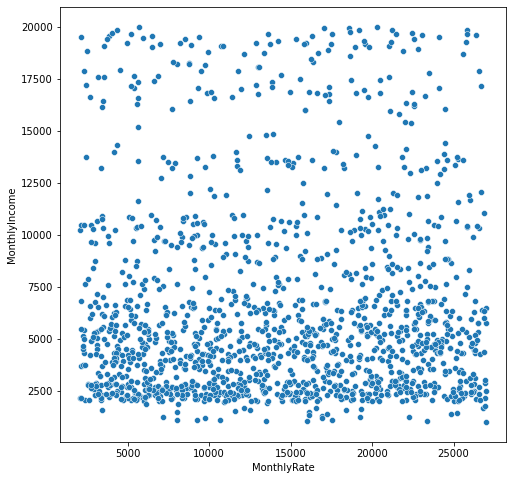

In [66]:
plt.figure(figsize=(8,8))
sns.scatterplot(y=df['MonthlyIncome'],x=df['MonthlyRate'])
plt.show()

PLot describing the relationship between monthly rate and monthly income<br>
quiet dense region in lower regions

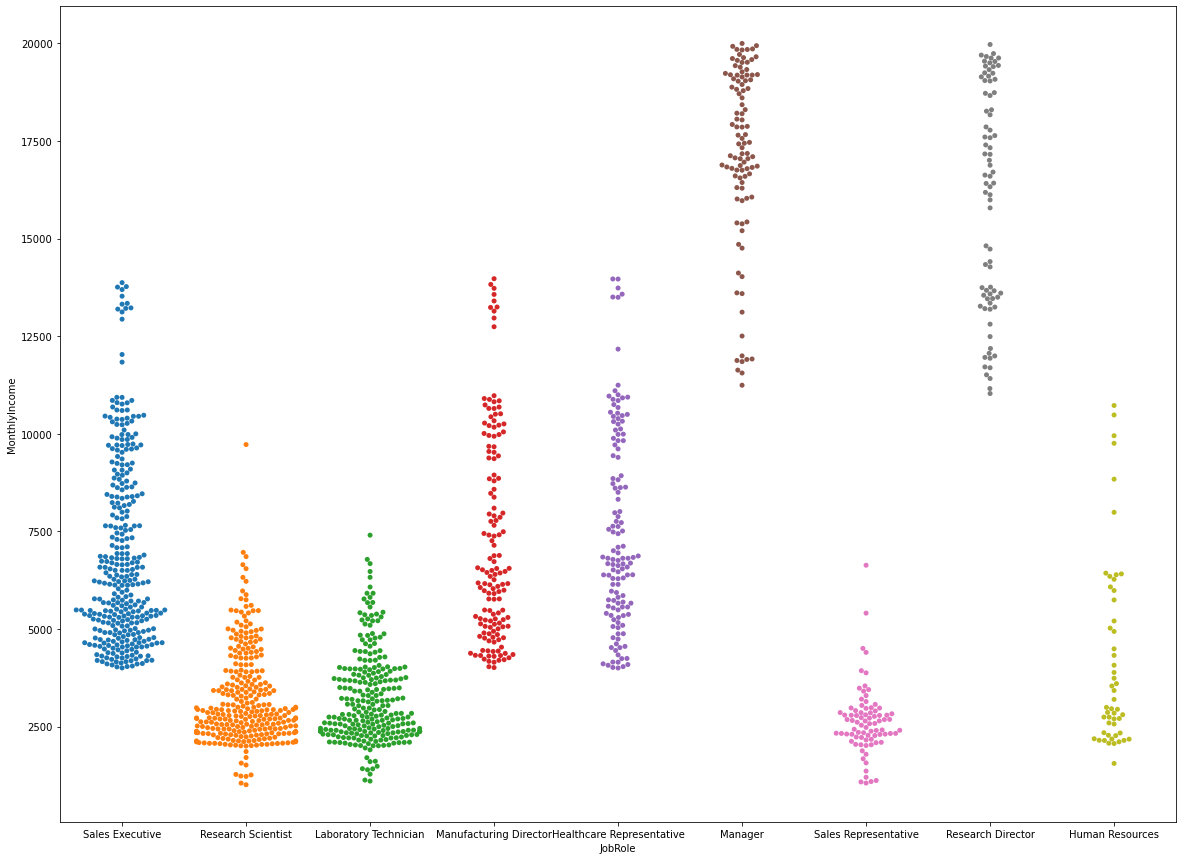

In [67]:
plt.figure(figsize=(20,15))
sns.swarmplot(y=df['MonthlyIncome'],x=df['JobRole'])
plt.show()

Sales rep are having low salaries as compared to other job roles<br>
Research Director and Manager are having high salaries<br>
Sales Executive have kind of uniform distribution of salary<br>



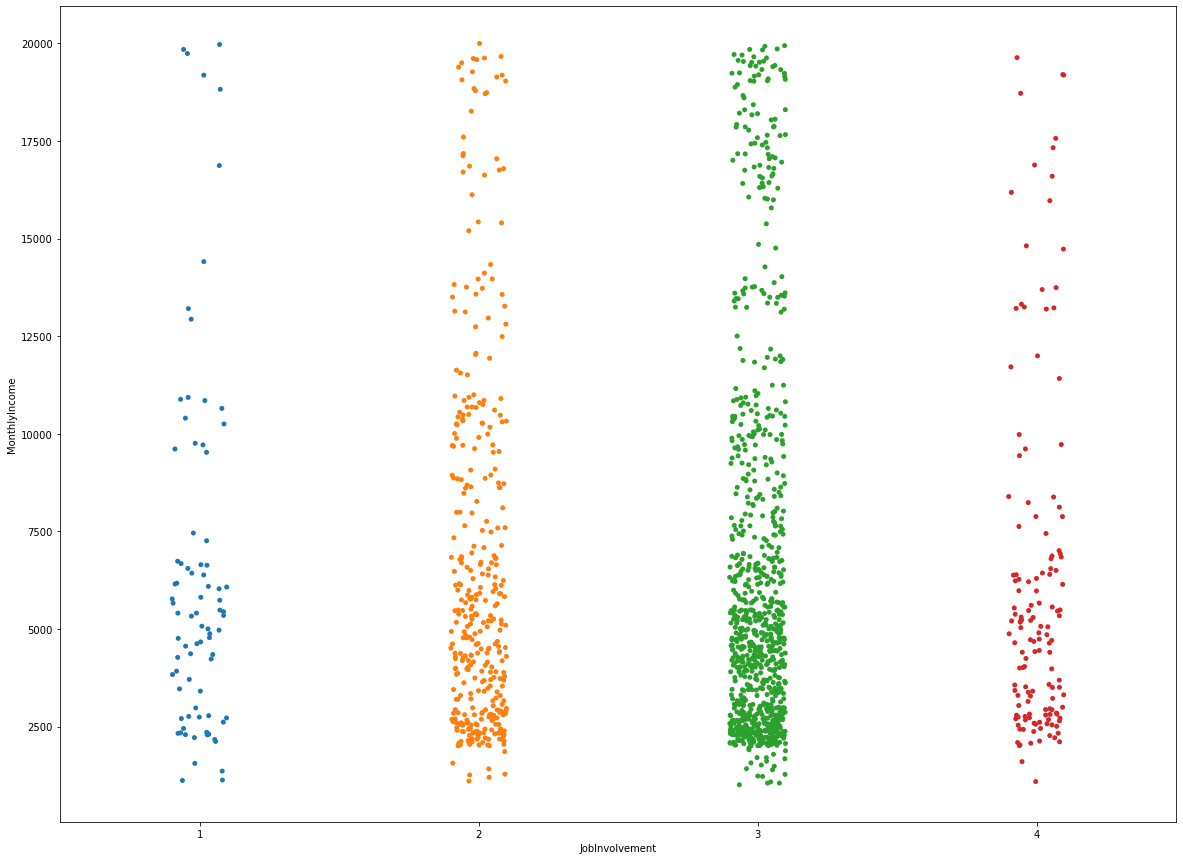

In [68]:
plt.figure(figsize=(20,15))
sns.stripplot(y=df['MonthlyIncome'],x=df['JobInvolvement'])
plt.show()

As the monthly income increases there is slight shift if higher levels of job involvement

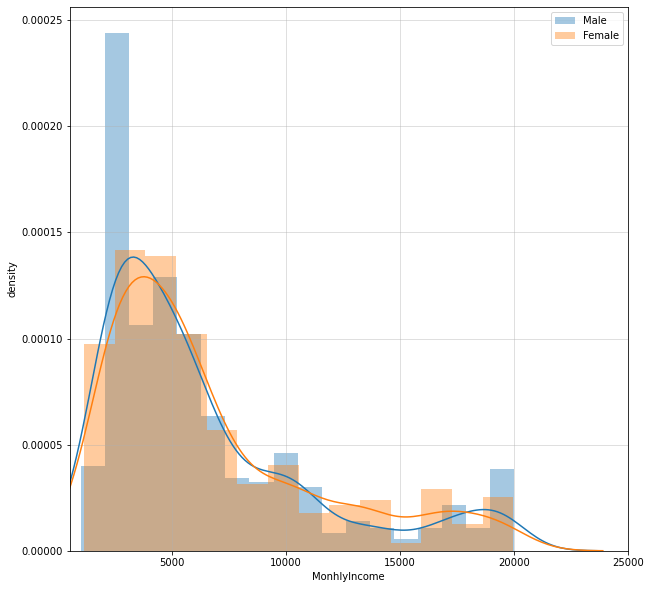

In [69]:
plt.figure(figsize=(10,10))
plt.grid(True,alpha=0.5)
sns.distplot(df.loc[df['Gender']=='Male','MonthlyIncome'],label='Male')
sns.distplot(df.loc[df['Gender']=='Female','MonthlyIncome'],label='Female')
plt.xlim(500,25000)
plt.xlabel('MonhlyIncome')
plt.ylabel('density')
plt.legend()
plt.show()

When it comes to monthly income distribution based on gender its almost identical in both female and male<br>
almost equal pay to both males and females depending on thier job role and position

Impact of NumberOfCompanies worked
----------------------

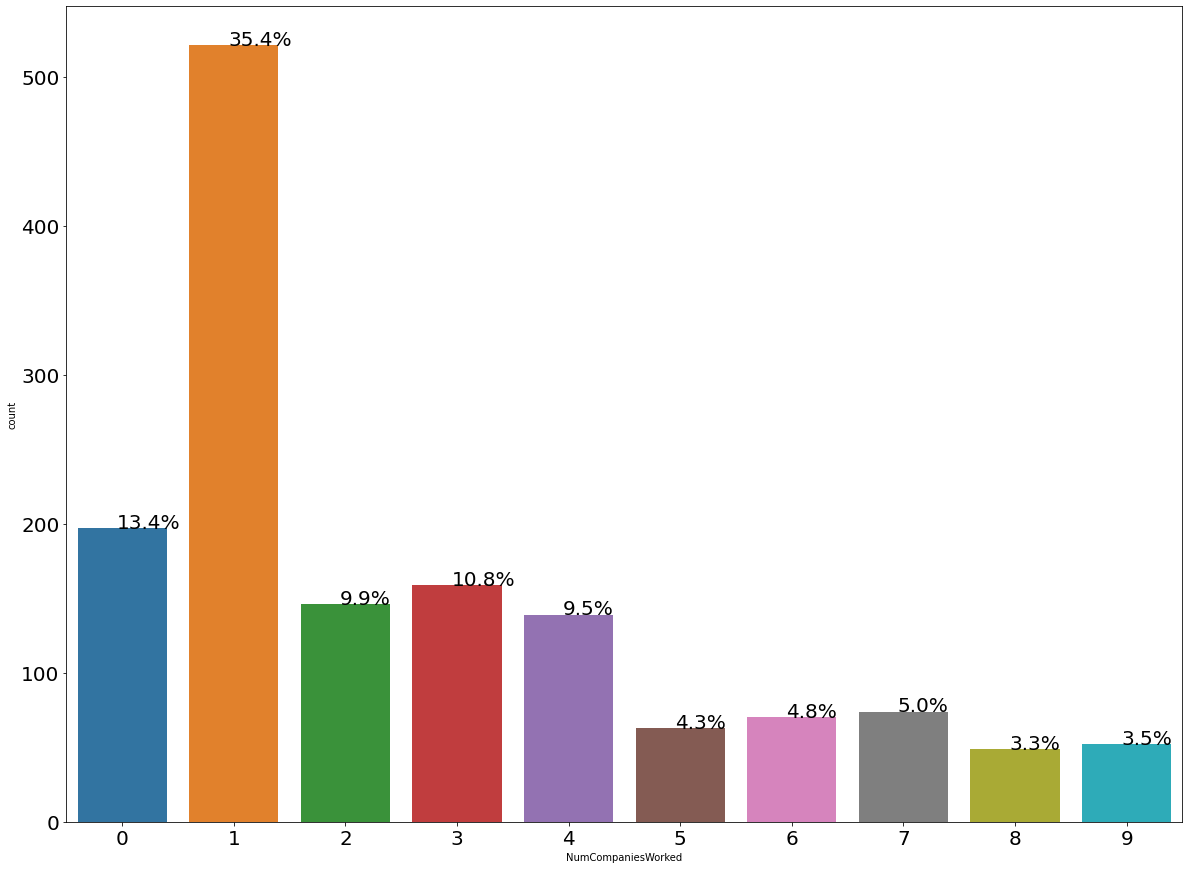

In [70]:
plt.figure(figsize=(20,15))
a=sns.countplot(x=df['NumCompaniesWorked'])

plt.xticks(size=20)
plt.yticks(size=20)
without_hue(a,df['NumCompaniesWorked'])
plt.show()

Majority(35.4) of the employees have a working experience in 1 company<br>
around 13.4% are absolute freshers<br>
those who worked in multiple comapanies are less maybe the senior employees or management<br> 

In [71]:
temp = df.groupby(['NumCompaniesWorked']).mean()
temp['NumCompaniesWorked'] = temp.index
fig = px.bar(temp,x='NumCompaniesWorked',y='MonthlyIncome', 
             color = 'MonthlyIncome', 
             title = "MonthlyIncome vs NumCompaniesWorked", 
             labels = {'MonthlyIncome': 'MonthlyIncome '},
             color_continuous_scale = 'Magma_r')
fig.show()

Plot describing the relationship of switching multiple comapnies and monthly income<br>
Those between average of 2 and 4 are sought to have the highest salaries

<Figure size 720x720 with 0 Axes>

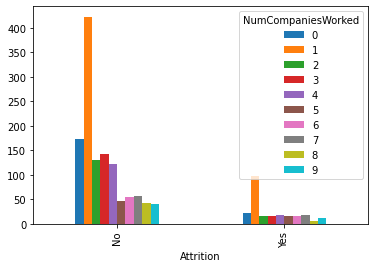

In [72]:
plt.figure(figsize=(10,10))
pd.crosstab(df['Attrition'],[df['NumCompaniesWorked']]).plot(kind='bar')
plt.show()

When it comes to Attrition those who have worked in a company may tend to attrinate higher among others

PercentSalaryHike
  --------------------

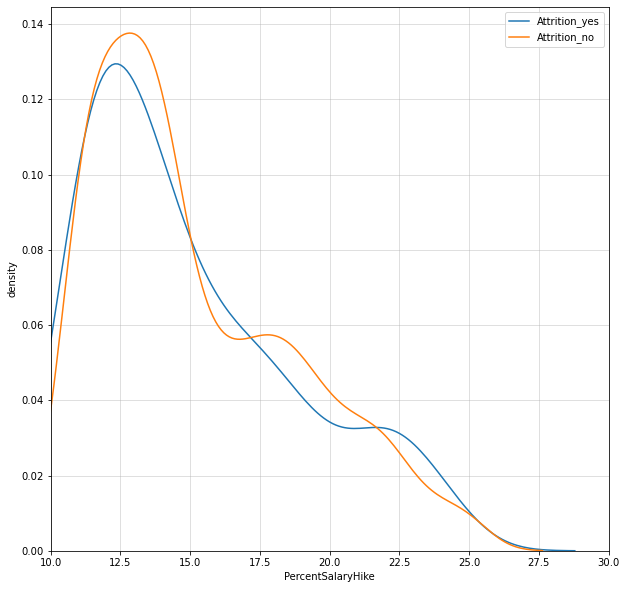

In [73]:
plt.figure(figsize=(10,10))
plt.grid(True,alpha=0.5)
sns.kdeplot(df.loc[df['Attrition']=='Yes','PercentSalaryHike'],label='Attrition_yes')
sns.kdeplot(df.loc[df['Attrition']=='No','PercentSalaryHike'],label='Attrition_no')
plt.xlim(10,30)
plt.xlabel('PercentSalaryHike')
plt.ylabel('density')
plt.legend()
plt.show()


Those having around  12.5 % salary hike are having a good count/density and chances of them leaving the company are also low<br>
count of employee getting a salary hike more than 20% is less and also attrition rates are higher than the non attrition rates as we can see the bulge in the curve<br>

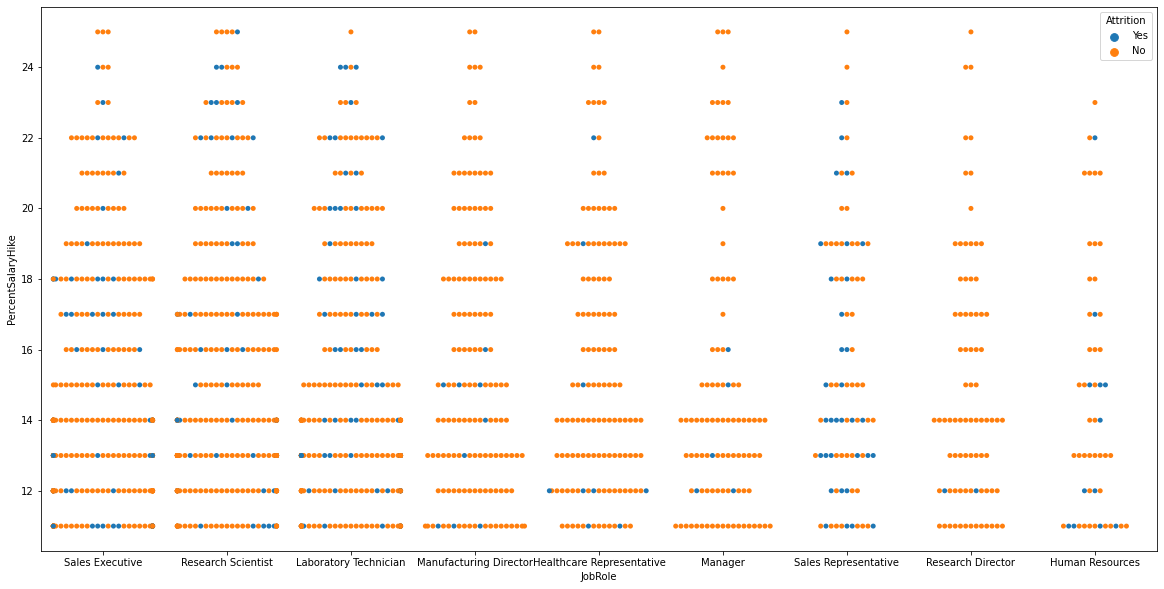

In [74]:
plt.figure(figsize=(20,10))
sns.swarmplot(x=df['JobRole'],y=df['PercentSalaryHike'],hue=df['Attrition'])
plt.show()

percent salary hikes are less at the top level as manager and research directors are showing less density in high percent salary hike region

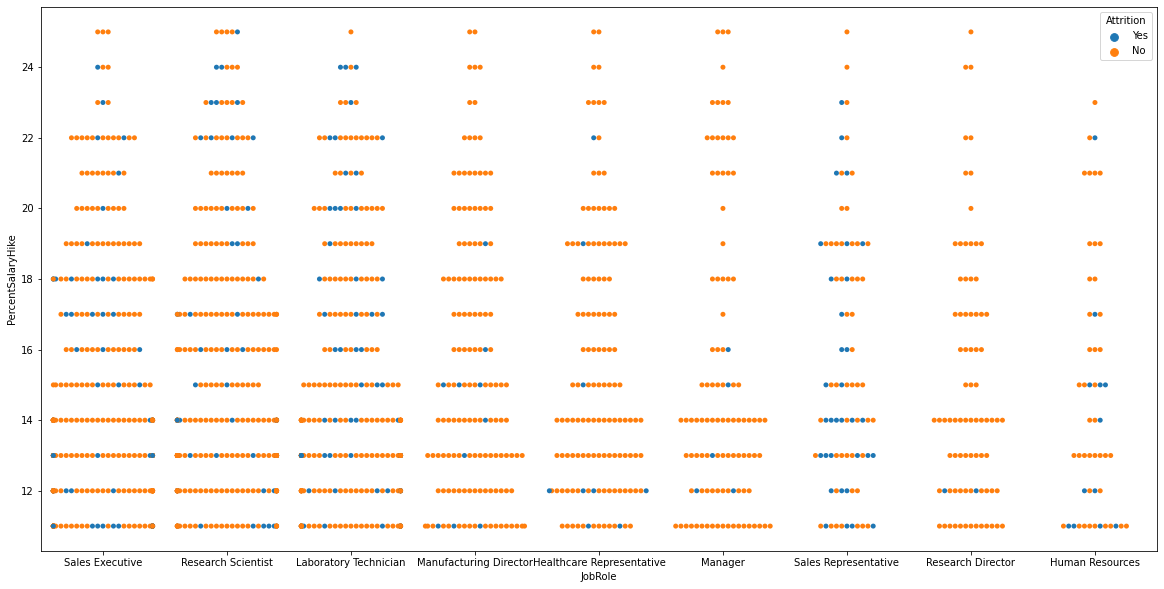

In [75]:
plt.figure(figsize=(20,10))
sns.swarmplot(x=df['JobRole'],y=df['PercentSalaryHike'],hue=df['Attrition'])
plt.show()

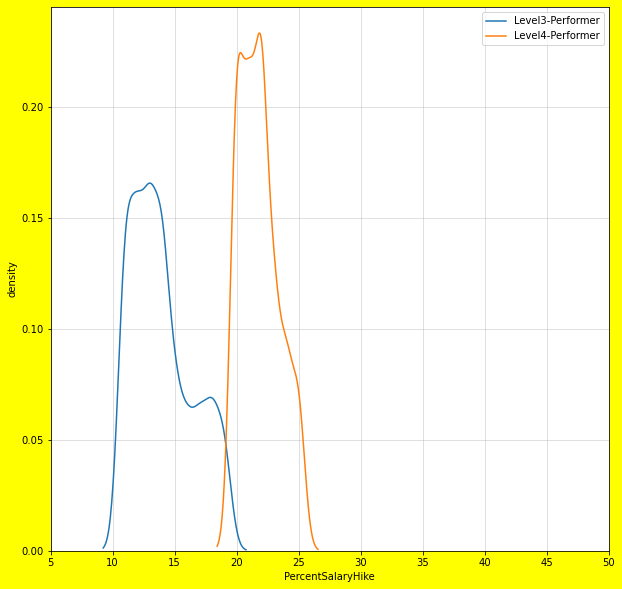

In [76]:
plt.figure(figsize=(10,10),facecolor='Yellow')
plt.grid(True,alpha=0.5)
sns.kdeplot(df.loc[df['PerformanceRating']==3,'PercentSalaryHike'],label='Level3-Performer')
sns.kdeplot(df.loc[df['PerformanceRating']==4,'PercentSalaryHike'],label='Level4-Performer')
plt.xlim(5,50)
plt.xlabel('PercentSalaryHike')
plt.ylabel('density')
plt.legend()
plt.show()


Level 4 performers are getting much percent hikes as compared to level3 performers

In [77]:
temp = df.groupby(['Education']).mean()
temp['Education'] = temp.index
fig = px.bar(temp,x='Education',y='PercentSalaryHike', 
             color = 'PercentSalaryHike', 
             title = "PercentSalaryHike vs Education", 
             labels = {'Education': 'Education'},
             color_continuous_scale = 'Magma_r')
fig.show()

HigherEduction levels are getting percentage salary hikes as compared to others

Performance Rating impact
-----------------------------

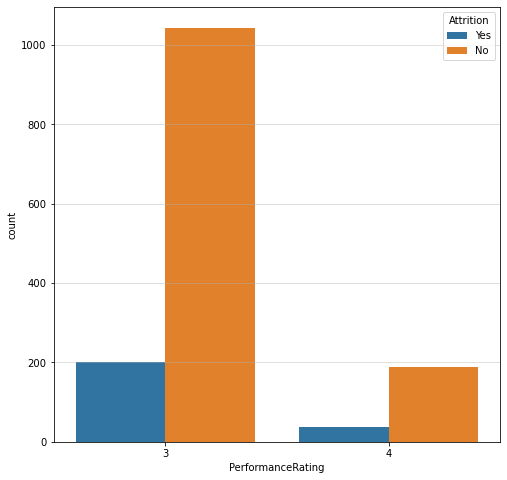

In [78]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.countplot(x=df['PerformanceRating'],hue=df['Attrition'])
plt.show()

Low attrition rates in level 4 category Performance rating<br>
Employee retention is easy when their perfirmance rating is at 4<br>


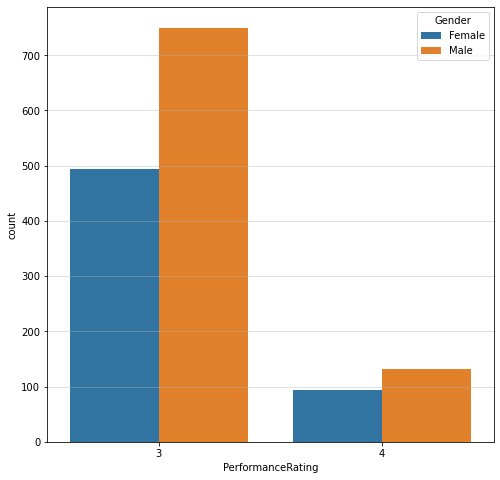

In [79]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.countplot(x=df['PerformanceRating'],hue=df['Gender'])
plt.show()

males have better performance rating when it comes to level 3 performance<br>
at level 4 both are almost equal performing

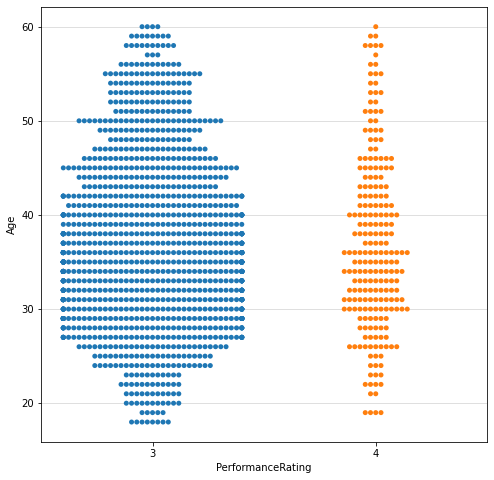

In [80]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.swarmplot(x=df['PerformanceRating'],y=df['Age'])
plt.show()

Most of level 4 performers lie in age range of 30 to 40 <br>


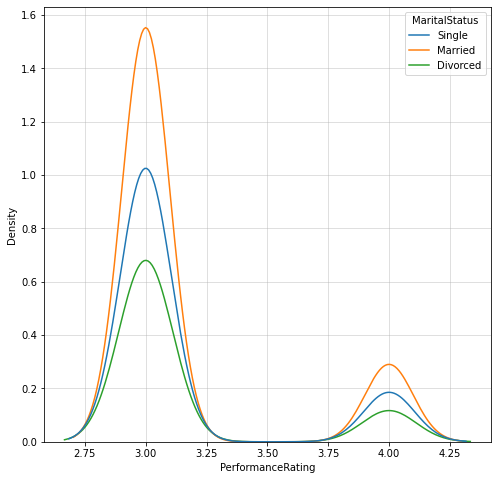

In [81]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.kdeplot(x=df['PerformanceRating'],hue=df['MaritalStatus'])
plt.show()

Married employees tends to do better in both level 3 and level 4 performance ratings<br>


Impact of RelationshipSatisfaction on other features and label
-------------------------

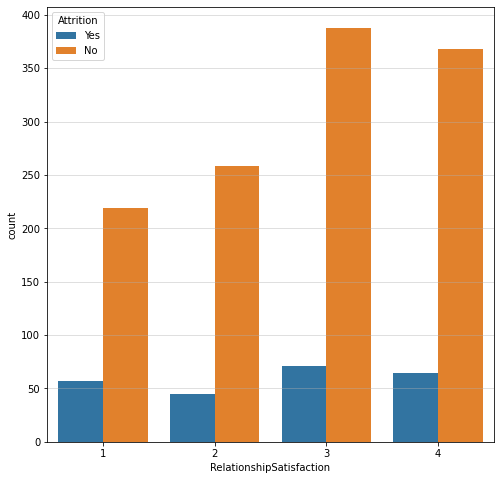

In [82]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.countplot(x=df['RelationshipSatisfaction'],hue=df['Attrition'])
plt.show()

Attrition rates are almost same in all 4 levels of relationshipsatisfaction<br>
So RelationshipSatifaction may not be important feature in deciding the attrition as same patter is observed in almost all categories<br>

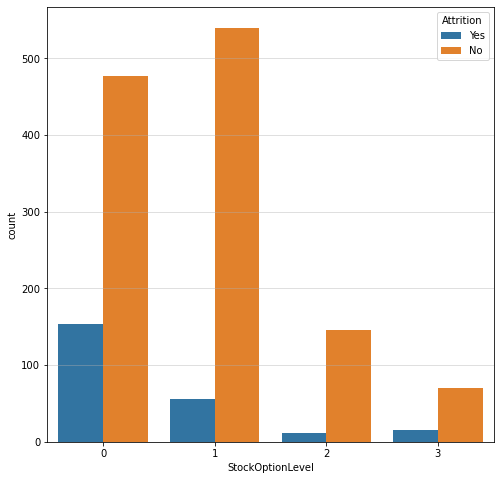

In [83]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.countplot(x=df['StockOptionLevel'],hue=df['Attrition'])
plt.show()

Its quiet obvious that having stockoption levels have a significant role in predicting attrition<br>
No stock level options are leading to high attrition rates<br>
as the stock option level increases there is gradual decrease in the attritions happening

TotalWorkingYears relationship with other features
----------------------------------

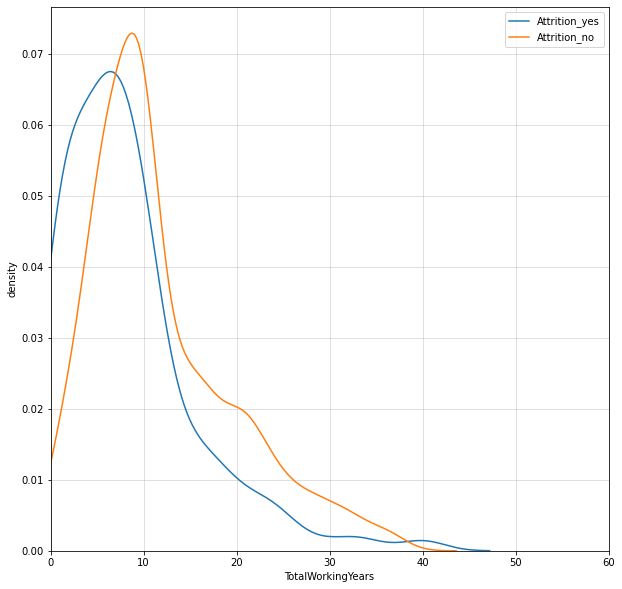

In [84]:
plt.figure(figsize=(10,10))
plt.grid(True,alpha=0.5)
sns.kdeplot(df.loc[df['Attrition']=='Yes','TotalWorkingYears'],label='Attrition_yes')
sns.kdeplot(df.loc[df['Attrition']=='No','TotalWorkingYears'],label='Attrition_no')
plt.xlim(0,60)
plt.xlabel('TotalWorkingYears')
plt.ylabel('density')
plt.legend()
plt.show()

The attrition rates reaches peak when the Total working years are around 7 to 9 years then it decreses drastically<br>
Though number of employees retained also reaches the peak in 9-10 years and their count is also greater than those leaving the company<br>

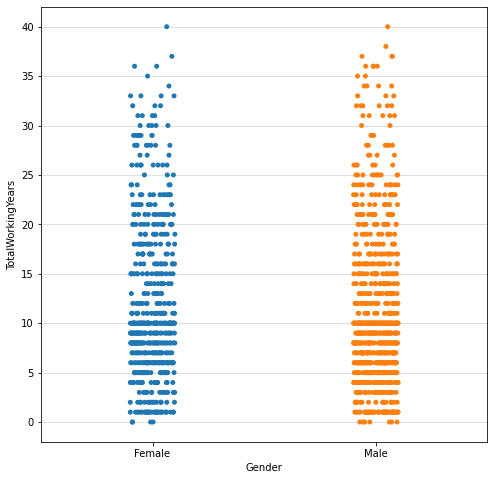

In [85]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.stripplot(x=df['Gender'],y=df['TotalWorkingYears'])
plt.show()

Follows the same distribution for the first 10 years or so<br>
after 10 years there are some disruptions in Females with the working years<br>
after 25 years both loose the patterns and become less desriptive

TrainingTimesLastYear
-----------------------

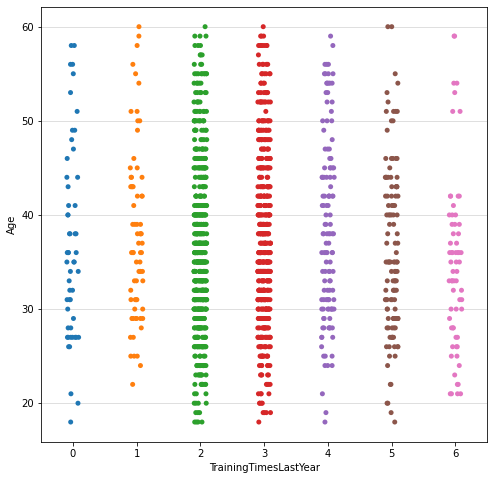

In [86]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.stripplot(y=df['Age'],x=df['TrainingTimesLastYear'])
plt.show()

Almost all the employees from age ranging 18 to 60 (freshers or experienced) are subjected to 2to 3 training a year<br>
maximum 6 trainings are for the employees between the age 20 to 40<br>

WorkLifeBalance 
--------------------------


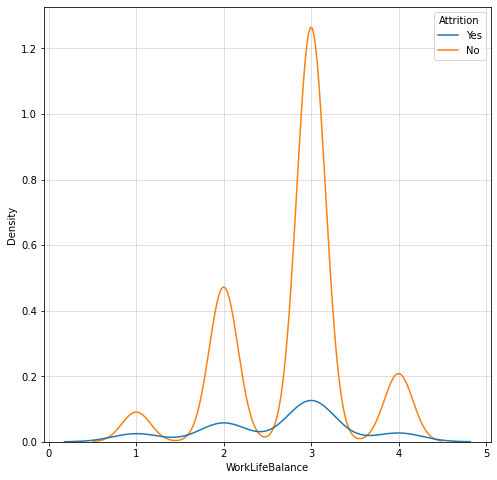

In [87]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.kdeplot(hue=df['Attrition'],x=df['WorkLifeBalance'])
plt.show()

Most of the employees have rated level 3 for work life balance which is a good sign for the company<br>
Attrition rates are also higher for level 3 this may be beacuse of the higher counts too <br>


<Figure size 720x720 with 0 Axes>

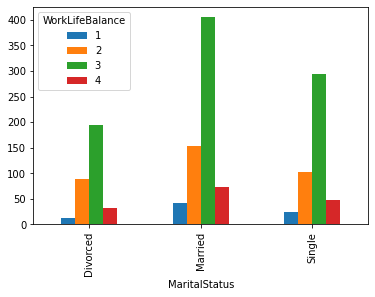

In [88]:
plt.figure(figsize=(10,10))
pd.crosstab(df['MaritalStatus'],[df['WorkLifeBalance']]).plot(kind='bar')
plt.show()

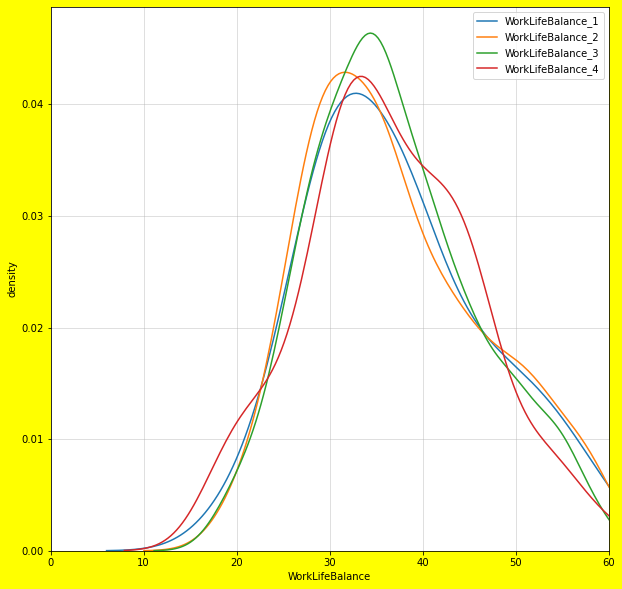

In [89]:
plt.figure(figsize=(10,10),facecolor='Yellow')
plt.grid(True,alpha=0.5)
sns.kdeplot(df.loc[df['WorkLifeBalance']==1,'Age'],label='WorkLifeBalance_1')
sns.kdeplot(df.loc[df['WorkLifeBalance']==2,'Age'],label='WorkLifeBalance_2')
sns.kdeplot(df.loc[df['WorkLifeBalance']==3,'Age'],label='WorkLifeBalance_3')
sns.kdeplot(df.loc[df['WorkLifeBalance']==4,'Age'],label='WorkLifeBalance_4')
plt.xlim(0,60)
plt.xlabel('WorkLifeBalance')
plt.ylabel('density')
plt.legend()
plt.show()

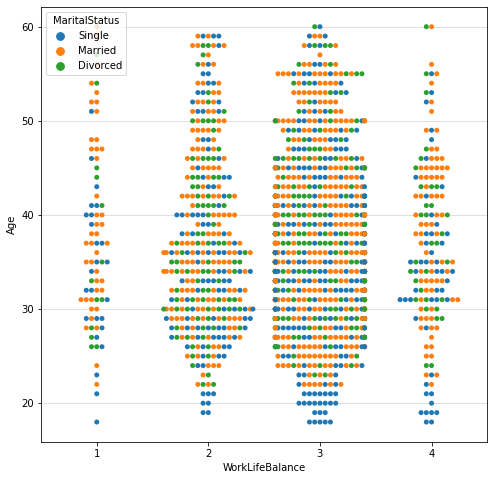

In [90]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.swarmplot(y=df['Age'],x=df['WorkLifeBalance'],hue=df['MaritalStatus'])
plt.show()

As the age increases there is shift in higher levels of worklifebalance which can be easily noted through the swarmplot<br>


In [91]:
df['YearsAtCompany'].unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

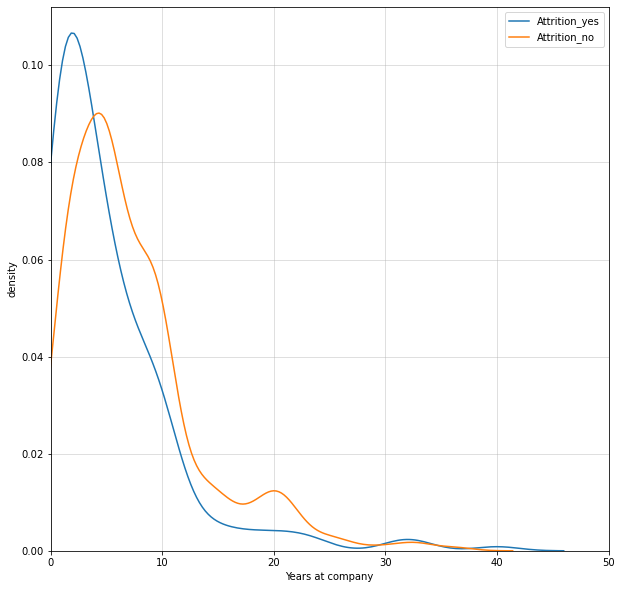

In [92]:
plt.figure(figsize=(10,10))
plt.grid(True,alpha=0.5)
sns.kdeplot(df.loc[df['Attrition']=='Yes','YearsAtCompany'],label='Attrition_yes')
sns.kdeplot(df.loc[df['Attrition']=='No','YearsAtCompany'],label='Attrition_no')
plt.xlim(0,50)
plt.xlabel('Years at company')
plt.ylabel('density')
plt.legend()
plt.show()


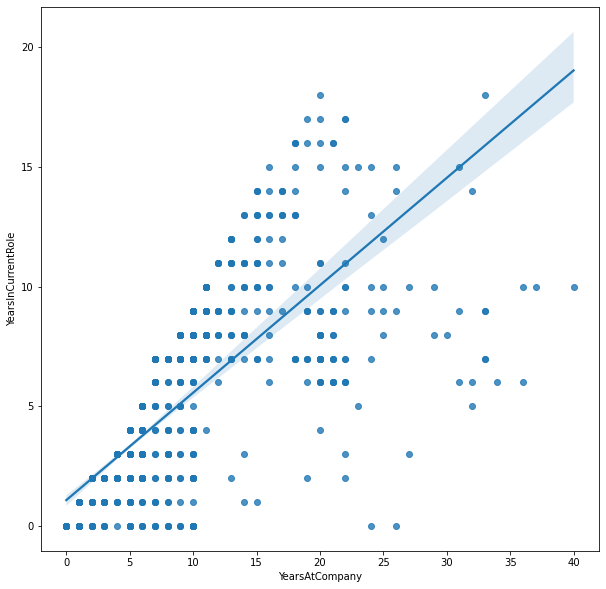

In [93]:
plt.figure(figsize=(10,10))
sns.regplot(y=df['YearsInCurrentRole'],x=df['YearsAtCompany'])
plt.show()

As the years in a company increases  years in current role also increases as linear pattern can be pbserved clearly<br>
This may be due to the reason that as the level in job increases and the job role increases Promotions also becomes slow leading to stagnation in the same role

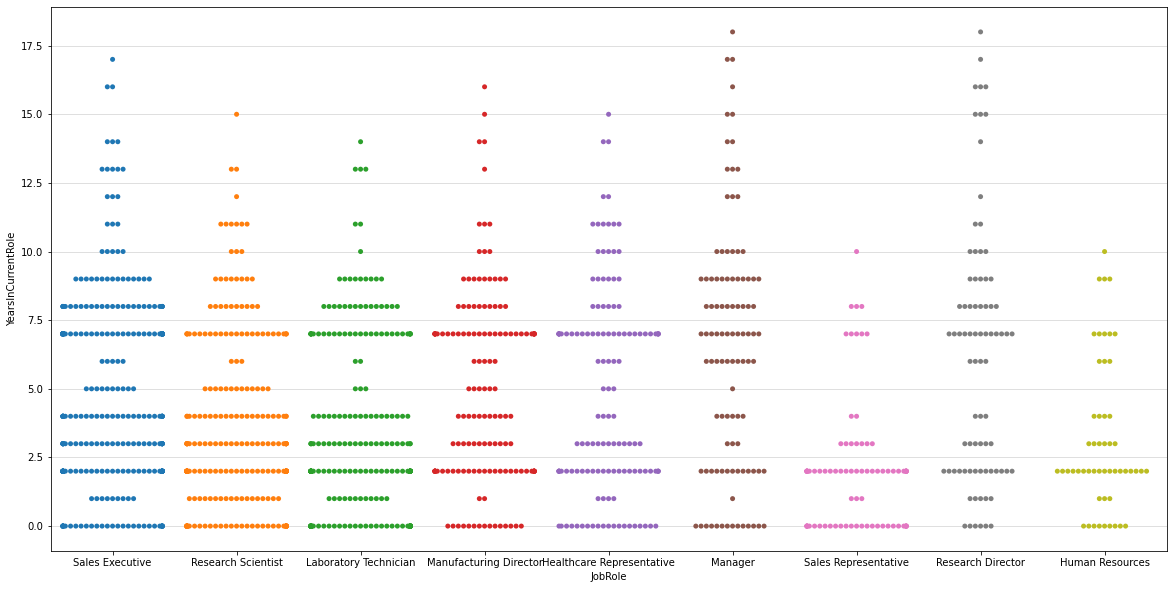

In [94]:
plt.figure(figsize=(20,10))
plt.grid(True,alpha=0.5)
sns.swarmplot(y=df['YearsInCurrentRole'],x=df['JobRole'])
plt.show()

Swamplot also clearly hints that at higher JobRoles/Position employees tends to spend higher number of years in that role<br>
Is one of the important feature in describing the attrition as its directly linked to age and Years in current role which directly impacts the attrition

Analysis complete
-----------------------

Checking for the outliers using boxplots
------------------------

In [95]:
cont_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [96]:
bb=['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

<function matplotlib.pyplot.show(close=None, block=None)>

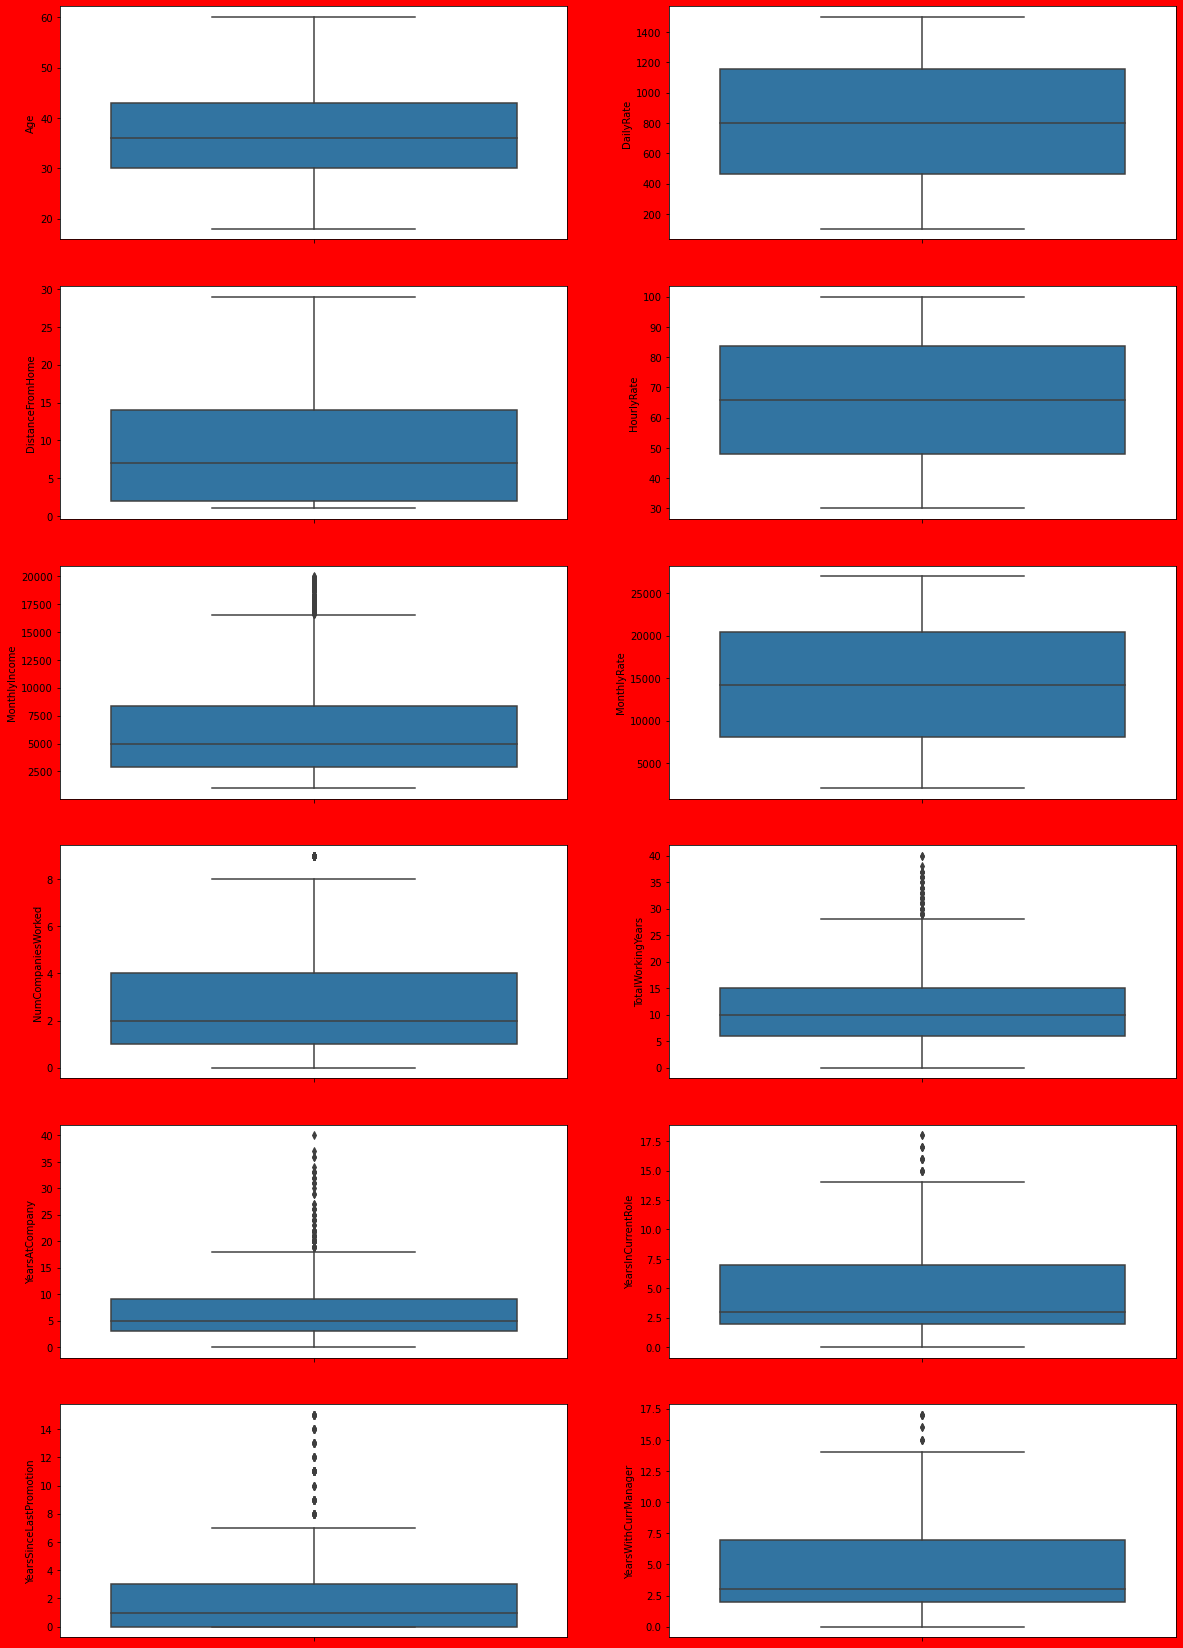

In [97]:
plt.figure(figsize=(20,30),facecolor='Red')
n=1
for i in bb:
    if (n<13):
        ax=plt.subplot(6,2,n)
        sns.boxplot(y=df[i])
    n+=1
plt.show    
    

we can clearly observe that<br>YearsSinceLastPromotion,<br>
YearsWithcurrentManager,<br>YearsAtCompany,<br>YearsinCurrentRole,<br>TotalWorkingYears, are containing significant amount of outliers and have to be controlled so that we can model better

Checking The skewness of  continuous data
-----------------------

In [98]:
cont_col=['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [99]:
cont=df[cont_col]

In [100]:
cont.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

It can be seen that <br>YearsAtCompany<br>,YearsIncutterntRole<br>,YearsSinceLastPromotiom<br>,YearsEithCurrMananger have skewness which can impact our model<br>
We have to use some techiniques to handle the skewness<br>

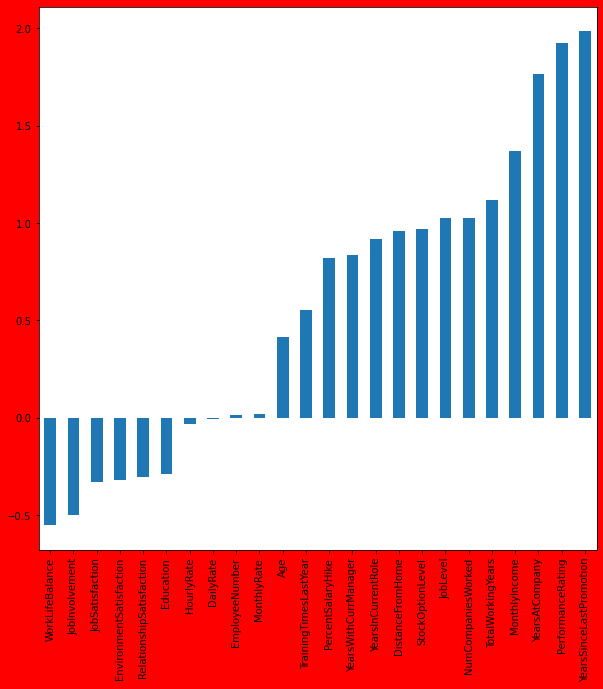

In [101]:
plt.figure(figsize=(10,10),facecolor='Red')
cont.skew().sort_values().plot(kind='bar')
plt.show()

skewnwess have to be reduced for some features 

In [102]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Transforming the label  as<br>
1  for Attrition='Yes'<br>
0 for Attrition='No'<br>

In [103]:
transformation={'Yes':1,
               "No":0}

In [104]:
df['Attrition']=df['Attrition'].map(transformation)

In [105]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Transformed succesfully!!!

Dividing the dataset into features(x) and labels(y)

In [106]:
x=df.drop(['Attrition'],axis=1)
y=df['Attrition']

Using BinaryEncoding Technique to encode our categorical columns

In [107]:
cat_col=['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
  'Over18']

In [108]:
import category_encoders as ce
ben=ce.BinaryEncoder(cols=cat_col)


In [109]:
x=ben.fit_transform(x)

In [110]:
x.columns

Index(['Age', 'BusinessTravel_0', 'BusinessTravel_1', 'DailyRate',
       'Department_0', 'Department_1', 'DistanceFromHome', 'Education',
       'EducationField_0', 'EducationField_1', 'EducationField_2',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender_0', 'Gender_1',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole_0', 'JobRole_1',
       'JobRole_2', 'JobRole_3', 'JobSatisfaction', 'MaritalStatus_0',
       'MaritalStatus_1', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18_0', 'OverTime_0', 'OverTime_1', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

All the categorical columns encoded succesfully!!

Since who had attrition as No are much more than those who had attrition it can be concluded that dataset is highly imbalanced and we have to perform "SMOTE" to balance the dataset

In [111]:
from imblearn.over_sampling import SMOTE

In [112]:
sm=SMOTE(0.80)

In [113]:
x_n,y_n=sm.fit_resample(x,y)

In [114]:
y_n.value_counts()

0    1233
1     986
Name: Attrition, dtype: int64

In [115]:
x_n.columns

Index(['Age', 'BusinessTravel_0', 'BusinessTravel_1', 'DailyRate',
       'Department_0', 'Department_1', 'DistanceFromHome', 'Education',
       'EducationField_0', 'EducationField_1', 'EducationField_2',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender_0', 'Gender_1',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole_0', 'JobRole_1',
       'JobRole_2', 'JobRole_3', 'JobSatisfaction', 'MaritalStatus_0',
       'MaritalStatus_1', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18_0', 'OverTime_0', 'OverTime_1', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Since having attrition as 1 are incresed drastically we will continue with this new y_n series

Using Power Trnasformer to scale and standardize the features

In [116]:
from sklearn.preprocessing import PowerTransformer

In [117]:
pt=PowerTransformer()

In [118]:
x_scaled=pd.DataFrame(pt.fit_transform(x_n),columns=x_n.columns)

In [119]:
x_scaled

Age  BusinessTravel_0  BusinessTravel_1  DailyRate  Department_0  \
0     0.672061         -0.549755          0.645744   0.851448     -1.230050   
1     1.397485          1.818994         -1.548600  -1.360065      0.812975   
2     0.258915         -0.549755          0.645744   1.453577      0.812975   
3    -0.197451          1.818994         -1.548600   1.494452      0.812975   
4    -0.987138         -0.549755          0.645744  -0.419811      0.812975   
...        ...               ...               ...        ...           ...   
2214 -0.845063         -0.549755          0.645744   0.842265     -1.230050   
2215  0.149228          1.818994         -1.548600  -0.045434     -1.230050   
2216 -0.574257         -0.549755         -1.548600  -0.035130     -1.230050   
2217  1.226987         -0.549755         -1.548600  -1.643999     -1.230050   
2218 -1.134080         -0.549755          0.645744   0.969989     -1.230050   

      Department_1  DistanceFromHome  Education  EducationField_0  \
0         1.530316         -1.586832  -0.795954         -0.473221   
1        -0.653460          0.138177  -1.764257         -0.473221   
2        -0.653460         -1.154553  -0.795954         -0.473221   
3        -0.653460         -0.833705   1.273423         -0.473221   
4        -0.653460         -1.154553  -1.764257         -0.473221   
...            ...               ...        ...               ...   
2214     -0.653460         -0.833705   0.220177         -0.473221   
2215     -0.653460          0.975549   0.220177         -0.473221   
2216     -0.653460         -0.833705   0.220177         -0.473221   
2217      1.530316          0.138177   0.220177          2.113177   
2218      1.530316          0.138177   0.220177          2.113177   

      EducationField_1  ...  PerformanceRating  RelationshipSatisfaction  \
0            -0.641543  ...       0.000000e+00                 -1.474378   
1            -0.641543  ...       6.938894e-18                  1.354714   
2             1.558742  ...       0.000000e+00                 -0.519895   
3            -0.641543  ...       0.000000e+00                  0.422026   
4             1.558742  ...       0.000000e+00                  1.354714   
...                ...  ...                ...                       ...   
2214         -0.641543  ...       0.000000e+00                  0.422026   
2215         -0.641543  ...       0.000000e+00                 -1.474378   
2216         -0.641543  ...       0.000000e+00                  0.422026   
2217         -0.641543  ...       0.000000e+00                  0.422026   
2218         -0.641543  ...       0.000000e+00                 -0.519895   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -0.909817          -0.049371              -2.521908   
1             0.875363           0.240402               0.394606   
2            -0.909817          -0.213062               0.394606   
3            -0.909817          -0.049371               0.394606   
4             0.875363          -0.393125               0.394606   
...                ...                ...                    ...   
2214         -0.909817          -0.822050               0.394606   
2215         -0.909817           0.919137              -0.433185   
2216         -0.909817          -1.087982               0.394606   
2217         -0.909817           0.820307               0.394606   
2218         -0.909817          -0.393125              -0.433185   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -1.991867        0.326538            0.418103   
1            0.462327        0.924788            1.065504   
2            0.462327       -2.133921           -1.507078   
3            0.462327        0.657899            1.065504   
4            0.462327       -0.767401           -0.239667   
...               ...             ...                 ...   
2214        -0.918979       -0.767401           -0.239667   
2215        -0.

Checking the skewness after standardization

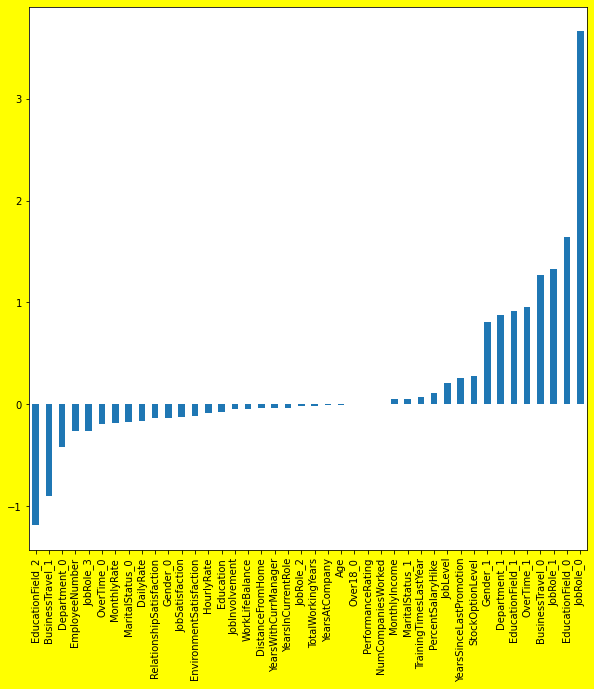

In [120]:
plt.figure(figsize=(10,10),facecolor='Yellow')
x_scaled.skew().sort_values().plot(kind='bar')
plt.show()

It can be seen that in <br>YearsAtCompany<br>,YearsIncutterntRole<br>,YearsSinceLastPromotiom<br>,YearsEithCurrMananger skewness have been successfully reduced<br>
so we have to stick to these transforme values

Outlier removal using z_score

In [121]:
x_scaled.shape

(2219, 42)

In [122]:
df_n=pd.concat([x_scaled,y_n],axis=1)

In [123]:
df_n.head()

Age  BusinessTravel_0  BusinessTravel_1  DailyRate  Department_0  \
0  0.672061         -0.549755          0.645744   0.851448     -1.230050   
1  1.397485          1.818994         -1.548600  -1.360065      0.812975   
2  0.258915         -0.549755          0.645744   1.453577      0.812975   
3 -0.197451          1.818994         -1.548600   1.494452      0.812975   
4 -0.987138         -0.549755          0.645744  -0.419811      0.812975   

   Department_1  DistanceFromHome  Education  EducationField_0  \
0      1.530316         -1.586832  -0.795954         -0.473221   
1     -0.653460          0.138177  -1.764257         -0.473221   
2     -0.653460         -1.154553  -0.795954         -0.473221   
3     -0.653460         -0.833705   1.273423         -0.473221   
4     -0.653460         -1.154553  -1.764257         -0.473221   

   EducationField_1  ...  RelationshipSatisfaction  StockOptionLevel  \
0         -0.641543  ...                 -1.474378         -0.909817   
1         -0.641543  ...                  1.354714          0.875363   
2          1.558742  ...                 -0.519895         -0.909817   
3         -0.641543  ...                  0.422026         -0.909817   
4          1.558742  ...                  1.354714          0.875363   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.049371              -2.521908        -1.991867        0.326538   
1           0.240402               0.394606         0.462327        0.924788   
2          -0.213062               0.394606         0.462327       -2.133921   
3          -0.049371               0.394606         0.462327        0.657899   
4          -0.393125               0.394606         0.462327       -0.767401   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0            0.418103                -1.024644              0.691481   
1            1.065504                 0.221522              1.082062   
2           -1.507078                -1.024644             -1.440512   
3            1.065504                 1.015252             -1.440512   
4           -0.239667                 0.728557             -0.192162   

   Attrition  
0          1  
1          0  
2          1  
3          0  
4          0  

[5 rows x 43 columns]

shape before outliers removal

In [124]:
df_n.shape

(2219, 43)

In [125]:
df_nums=df_n.copy()


In [126]:
from datasist.structdata import detect_outliers

In [127]:
outliers = detect_outliers(df_nums[cont_col],0,df_nums[cont_col].columns)

In [128]:
df_nums.drop(outliers,inplace=True)

In [129]:
df_nums.shape

(1680, 43)

shape after ouliers removal  

In [130]:
df_nums.shape

(1680, 43)

percent loss is

In [131]:
(2219-1659)/2219*100

25.236593059936908

Since loss is 25.23% which is a huge loss in the dataset as its much more than the safe  limit of  10% we will continue without oiylier removal

In [132]:
x_scaled=df_n.drop(['Attrition'],axis=1)
y=df_n['Attrition']

In [133]:
x_scaled

Age  BusinessTravel_0  BusinessTravel_1  DailyRate  Department_0  \
0     0.672061         -0.549755          0.645744   0.851448     -1.230050   
1     1.397485          1.818994         -1.548600  -1.360065      0.812975   
2     0.258915         -0.549755          0.645744   1.453577      0.812975   
3    -0.197451          1.818994         -1.548600   1.494452      0.812975   
4    -0.987138         -0.549755          0.645744  -0.419811      0.812975   
...        ...               ...               ...        ...           ...   
2214 -0.845063         -0.549755          0.645744   0.842265     -1.230050   
2215  0.149228          1.818994         -1.548600  -0.045434     -1.230050   
2216 -0.574257         -0.549755         -1.548600  -0.035130     -1.230050   
2217  1.226987         -0.549755         -1.548600  -1.643999     -1.230050   
2218 -1.134080         -0.549755          0.645744   0.969989     -1.230050   

      Department_1  DistanceFromHome  Education  EducationField_0  \
0         1.530316         -1.586832  -0.795954         -0.473221   
1        -0.653460          0.138177  -1.764257         -0.473221   
2        -0.653460         -1.154553  -0.795954         -0.473221   
3        -0.653460         -0.833705   1.273423         -0.473221   
4        -0.653460         -1.154553  -1.764257         -0.473221   
...            ...               ...        ...               ...   
2214     -0.653460         -0.833705   0.220177         -0.473221   
2215     -0.653460          0.975549   0.220177         -0.473221   
2216     -0.653460         -0.833705   0.220177         -0.473221   
2217      1.530316          0.138177   0.220177          2.113177   
2218      1.530316          0.138177   0.220177          2.113177   

      EducationField_1  ...  PerformanceRating  RelationshipSatisfaction  \
0            -0.641543  ...       0.000000e+00                 -1.474378   
1            -0.641543  ...       6.938894e-18                  1.354714   
2             1.558742  ...       0.000000e+00                 -0.519895   
3            -0.641543  ...       0.000000e+00                  0.422026   
4             1.558742  ...       0.000000e+00                  1.354714   
...                ...  ...                ...                       ...   
2214         -0.641543  ...       0.000000e+00                  0.422026   
2215         -0.641543  ...       0.000000e+00                 -1.474378   
2216         -0.641543  ...       0.000000e+00                  0.422026   
2217         -0.641543  ...       0.000000e+00                  0.422026   
2218         -0.641543  ...       0.000000e+00                 -0.519895   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -0.909817          -0.049371              -2.521908   
1             0.875363           0.240402               0.394606   
2            -0.909817          -0.213062               0.394606   
3            -0.909817          -0.049371               0.394606   
4             0.875363          -0.393125               0.394606   
...                ...                ...                    ...   
2214         -0.909817          -0.822050               0.394606   
2215         -0.909817           0.919137              -0.433185   
2216         -0.909817          -1.087982               0.394606   
2217         -0.909817           0.820307               0.394606   
2218         -0.909817          -0.393125              -0.433185   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -1.991867        0.326538            0.418103   
1            0.462327        0.924788            1.065504   
2            0.462327       -2.133921           -1.507078   
3            0.462327        0.657899            1.065504   
4            0.462327       -0.767401           -0.239667   
...               ...             ...                 ...   
2214        -0.918979       -0.767401           -0.239667   
2215        -0.

CHECKING FOR THE MULTICOLIINEARITY PROBLEM!!
----------------------

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
vif=pd.DataFrame()

In [136]:
vif['features']=x_scaled.columns

In [137]:
vif['scores']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [138]:
vif

features    scores
0                        Age  2.260491
1           BusinessTravel_0  1.607780
2           BusinessTravel_1  1.690895
3                  DailyRate  1.059939
4               Department_0  2.931810
5               Department_1  2.807001
6           DistanceFromHome  1.053667
7                  Education  1.122166
8           EducationField_0  1.598682
9           EducationField_1  1.286966
10          EducationField_2  1.625184
11            EmployeeNumber  1.058774
12   EnvironmentSatisfaction  1.118527
13                  Gender_0  2.850155
14                  Gender_1  2.873648
15                HourlyRate  1.037118
16            JobInvolvement  1.117604
17                  JobLevel  6.800329
18                 JobRole_0  1.448151
19                 JobRole_1  1.411002
20                 JobRole_2  2.055413
21                 JobRole_3  1.482176
22           JobSatisfaction  1.097084
23           MaritalStatus_0  2.985816
24           MaritalStatus_1  1.525476
25             MonthlyIncome  6.374798
26               MonthlyRate  1.070859
27        NumCompaniesWorked  1.433241
28                  Over18_0  1.000000
29                OverTime_0  3.038814
30                OverTime_1  2.523106
31         PercentSalaryHike  1.044370
32         PerformanceRating  1.527448
33  RelationshipSatisfaction  1.079245
34          StockOptionLevel  2.180183
35         TotalWorkingYears  5.504635
36     TrainingTimesLastYear  1.077787
37           WorkLifeBalance  1.081022
38            YearsAtCompany  7.058566
39        YearsInCurrentRole  3.989685
40   YearsSinceLastPromotion  1.597154
41      YearsWithCurrManager  3.689914

Variance Inflation Factor of MonthlyIncome is at critical state<br>
Variance inflation Factor of YearsAtCompany is exceeding the critical value and we have to reconsider selection of ou top features when finalising the features

Selecting best features using SelectKBest
-----------------------


In [139]:
x_scaled.shape[1]

42

In [140]:
from sklearn.feature_selection import SelectKBest,f_classif

after multiple iterations 28 features gave the best result in terms of accuracy of both training and testing so we will go with this

In [141]:
sel=SelectKBest(score_func=f_classif,k=28)

In [142]:
k=28

In [143]:
fit=sel.fit(x_scaled,y)

In [144]:
cols=fit.get_support(indices=True)

In [145]:
print(f' top {k} FEATURES INDEX  = {cols}')

 top 28 FEATURES INDEX  = [ 0  1  2  4  7  9 10 12 13 14 16 17 18 19 22 23 25 29 32 33 34 35 36 37
 38 39 40 41]


GETTING THE FEATURES OF BASED ON THE INDICES AND SAVING THEM AS FEATUERES

In [146]:
features=x_scaled.columns[cols]

In [147]:
len(features)

28

In [148]:
features_scores=pd.DataFrame()

features_scores['FEATURES']=x_scaled.columns
features_scores['SCORES']=fit.scores_

In [149]:
features_scores.sort_values(by='SCORES',ascending=False,inplace=True)

In [150]:
print(f'TOP {k} FEATURES AND SCORES ARE AS FOLLOWS')

TOP 28 FEATURES AND SCORES ARE AS FOLLOWS


In [151]:
features_scores[:29]

FEATURES      SCORES
29                OverTime_0  692.979501
23           MaritalStatus_0  389.640805
34          StockOptionLevel  279.978825
16            JobInvolvement  267.133194
2           BusinessTravel_1  232.623234
17                  JobLevel  224.399532
35         TotalWorkingYears  212.834459
12   EnvironmentSatisfaction  208.144018
41      YearsWithCurrManager  193.637670
39        YearsInCurrentRole  192.337428
38            YearsAtCompany  188.262778
19                 JobRole_1  185.839191
22           JobSatisfaction  184.171875
9           EducationField_1  166.619536
25             MonthlyIncome  155.190823
4               Department_0  151.854202
0                        Age  137.458412
37           WorkLifeBalance  120.319041
14                  Gender_1  120.309298
36     TrainingTimesLastYear  111.200245
33  RelationshipSatisfaction   79.588167
7                  Education   78.420075
10          EducationField_2   76.771483
32         PerformanceRating   61.591992
18                 JobRole_0   58.573372
13                  Gender_0   42.232598
1           BusinessTravel_0   37.251550
40   YearsSinceLastPromotion   36.485465
30                OverTime_1   35.156236

In [152]:
x_scaled=x_scaled[features]

In [153]:
x_scaled.head()

Age  BusinessTravel_0  BusinessTravel_1  Department_0  Education  \
0  0.672061         -0.549755          0.645744     -1.230050  -0.795954   
1  1.397485          1.818994         -1.548600      0.812975  -1.764257   
2  0.258915         -0.549755          0.645744      0.812975  -0.795954   
3 -0.197451          1.818994         -1.548600      0.812975   1.273423   
4 -0.987138         -0.549755          0.645744      0.812975  -1.764257   

   EducationField_1  EducationField_2  EnvironmentSatisfaction  Gender_0  \
0         -0.641543          0.569197                -0.398110 -1.067627   
1         -0.641543          0.569197                 0.501823  0.936657   
2          1.558742         -1.756860                 1.341465  0.936657   
3         -0.641543          0.569197                 1.341465 -1.067627   
4          1.558742          0.569197                -1.386117  0.936657   

   Gender_1  ...  PerformanceRating  RelationshipSatisfaction  \
0  1.483921  ...       0.000000e+00                 -1.474378   
1 -0.673891  ...       6.938894e-18                  1.354714   
2 -0.673891  ...       0.000000e+00                 -0.519895   
3  1.483921  ...       0.000000e+00                  0.422026   
4 -0.673891  ...       0.000000e+00                  1.354714   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0         -0.909817          -0.049371              -2.521908   
1          0.875363           0.240402               0.394606   
2         -0.909817          -0.213062               0.394606   
3         -0.909817          -0.049371               0.394606   
4          0.875363          -0.393125               0.394606   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0        -1.991867        0.326538            0.418103   
1         0.462327        0.924788            1.065504   
2         0.462327       -2.133921           -1.507078   
3         0.462327        0.657899            1.065504   
4         0.462327       -0.767401           -0.239667   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                -1.024644              0.691481  
1                 0.221522              1.082062  
2                -1.024644             -1.440512  
3                 1.015252             -1.440512  
4                 0.728557             -0.192162  

[5 rows x 28 columns]

In [154]:
x_scaled.shape

(2219, 28)

IMPORTING NECESSARY  LIBRARIES

In [155]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.metrics import plot_roc_curve,roc_auc_score,roc_curve

USING FOR LOOP TO ITERATE WITH DIFFERENT RANDOM_STATES AND SELECTING THE RANDOM STATE WITH HIGH TRAINING AND TESTING ACCURACY

In [156]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=accuracy_score(y_train,lr_train_pred)
    lr_test_accuracy=accuracy_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}  --AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 4


TRAINING ACCURACY IS -90.54  --AND TESTING ACCURACY IS 90.54


AT RANDOM STATE-- 61


TRAINING ACCURACY IS -90.48  --AND TESTING ACCURACY IS 90.54


AT RANDOM STATE-- 74


TRAINING ACCURACY IS -90.31  --AND TESTING ACCURACY IS 90.32


AT RANDOM STATE-- 118


TRAINING ACCURACY IS -90.48  --AND TESTING ACCURACY IS 90.54


AT RANDOM STATE-- 139


TRAINING ACCURACY IS -90.25  --AND TESTING ACCURACY IS 90.32


AT RANDOM STATE-- 182


TRAINING ACCURACY IS -89.92  --AND TESTING ACCURACY IS 89.86


AT RANDOM STATE-- 217


TRAINING ACCURACY IS -90.31  --AND TESTING ACCURACY IS 90.32


AT RANDOM STATE-- 219


TRAINING ACCURACY IS -90.25  --AND TESTING ACCURACY IS 90.32


AT RANDOM STATE-- 231


TRAINING ACCURACY IS -90.54  --AND TESTING ACCURACY IS 90.54


AT RANDOM STATE-- 279


TRAINING ACCURACY IS -90.54  --AND TESTING ACCURACY IS 90.54


AT RANDOM STATE-- 297


TRAINING ACCURACY IS -90.25  --AND TESTING ACCURACY IS 90.32


AT RANDOM STATE-- 306


TRAINING ACCURACY IS 

SINCE ITS GIVING almost SAME VALUE for all random states we can take any taking random state as 165

In [157]:
ran=165

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=165)

In [159]:
def score(mod,x_train,x_test,y_train,y_test,train):
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=accuracy_score(y_train,y_pred)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCONFUSION MATRIX FOR THE TRAINIG')
        print('\n\n',confusion_matrix(y_train,y_pred))
        print('\n\nCLASSIFICATION REPORT for training --')
        print('\n\n',classification_report(y_train,y_pred))
        
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=accuracy_score(y_test,y_pred)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCONFUSION MATRIX FOR THE TESTING')
        print('\n\n',confusion_matrix(y_test,y_pred))
        print('\n\nCLASSIFICATION REPORT for testing --')
        print('\n\n',classification_report(y_test,y_pred))

In [160]:
lr=LogisticRegression()

In [161]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LogisticRegression() is 91.04


CONFUSION MATRIX FOR THE TRAINIG


 [[926  58]
 [101 690]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.90      0.94      0.92       984
           1       0.92      0.87      0.90       791

    accuracy                           0.91      1775
   macro avg       0.91      0.91      0.91      1775
weighted avg       0.91      0.91      0.91      1775



Testing SCORE FOR THE LogisticRegression() is 88.29


CONFUSION MATRIX FOR THE TESTING


 [[227  22]
 [ 30 165]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.88      0.91      0.90       249
           1       0.88      0.85      0.86       195

    accuracy                           0.88       444
   macro avg       0.88      0.88      0.88       444
weighted avg       0.88      0.88      0.88       444



In [162]:
test_pred=lr.predict(x_test)
lr_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
for i in range(2,11):
    cross_val=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print('\nAT CV =',i)
    print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
    print("\nTEST ACCURACY SCORE IS ",lr_test_accuracy)      
    print('-------------')


AT CV = 2

CROSS VAL SCORE IS  87.65

TEST ACCURACY SCORE IS  88.29
-------------

AT CV = 3

CROSS VAL SCORE IS  87.65

TEST ACCURACY SCORE IS  88.29
-------------

AT CV = 4

CROSS VAL SCORE IS  87.84

TEST ACCURACY SCORE IS  88.29
-------------

AT CV = 5

CROSS VAL SCORE IS  88.83

TEST ACCURACY SCORE IS  88.29
-------------

AT CV = 6

CROSS VAL SCORE IS  89.46

TEST ACCURACY SCORE IS  88.29
-------------

AT CV = 7

CROSS VAL SCORE IS  89.45

TEST ACCURACY SCORE IS  88.29
-------------

AT CV = 8

CROSS VAL SCORE IS  89.65

TEST ACCURACY SCORE IS  88.29
-------------

AT CV = 9

CROSS VAL SCORE IS  89.87

TEST ACCURACY SCORE IS  88.29
-------------

AT CV = 10

CROSS VAL SCORE IS  90.0

TEST ACCURACY SCORE IS  88.29
-------------


SINCE THERE IS NOT MYCH DIFFERNCE BETWEEEN CROSS VAL SCORE AND TEST ACCURACY SCORE AT CV =5 <BR>
IT CAN BE DEDUCED THAT OUR MODEL IS NOT OVERFITTING AND WE CAN PROCEED WITH RANDOM STATE -165 AND CV=5

In [163]:
c=5

In [164]:
from sklearn.model_selection import GridSearchCV

---------------------HYPER PARAMETER TUNING FOR LOGISTIC REGRESSION---------------------------------------------------------

In [165]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [166]:
C = np.logspace(-10, 10, 50)
penalty = ['l1', 'l2']

In [167]:
params={'C':C,'penalty':penalty}

In [168]:
gsc=GridSearchCV(lr,param_grid=params)

In [169]:
gsc.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 2.55954792e-10, 6.55128557e-10, 1.67683294e-09,
       4.29193426e-09, 1.09854114e-08, 2.81176870e-08, 7.19685673e-08,
       1.84206997e-07, 4.71486636e-07, 1.20679264e-06, 3.08884360e-06,
       7.90604321e-06, 2.02358965e-05, 5.17947468e-05, 1.32571137e-04,
       3.39322177e-04, 8.68511374e-04, 2.22299648e-0...
       2.68269580e+01, 6.86648845e+01, 1.75751062e+02, 4.49843267e+02,
       1.15139540e+03, 2.94705170e+03, 7.54312006e+03, 1.93069773e+04,
       4.94171336e+04, 1.26485522e+05, 3.23745754e+05, 8.28642773e+05,
       2.12095089e+06, 5.42867544e+06, 1.38949549e+07, 3.55648031e+07,
       9.10298178e+07, 2.32995181e+08, 5.96362332e+08, 1.52641797e+09,
       3.90693994e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2']})

In [170]:
gsc.best_params_

{'C': 4.094915062380419, 'penalty': 'l2'}

In [171]:
lr=LogisticRegression()

In [172]:
lr=gsc.best_estimator_

In [173]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LogisticRegression(C=4.094915062380419) is 90.87


CONFUSION MATRIX FOR THE TRAINIG


 [[925  59]
 [103 688]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.90      0.94      0.92       984
           1       0.92      0.87      0.89       791

    accuracy                           0.91      1775
   macro avg       0.91      0.90      0.91      1775
weighted avg       0.91      0.91      0.91      1775



Testing SCORE FOR THE LogisticRegression(C=4.094915062380419) is 88.06


CONFUSION MATRIX FOR THE TESTING


 [[226  23]
 [ 30 165]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.88      0.91      0.90       249
           1       0.88      0.85      0.86       195

    accuracy                           0.88       444
   macro avg       0.88      0.88      0.88       444
weighted avg       0.88      0.88      0.88    

In [174]:
test_pred=lr.predict(x_test)
lr_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [175]:
cross_val=cross_val_score(lr,x_scaled,y,cv=5).mean()

In [176]:
print(f'\nAt random state {ran} and CV :{c}')
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",lr_test_accuracy)


At random state 165 and CV :5

CROSS VAL SCORE IS  88.74

TEST ACCURACY SCORE IS  88.06


SINCE ACCURACIES REMAIN SAME EVEN AFTER HYPER PARAMETER TUNING WE WILL CONTINUE WITH THIS PARAMETERS 

MODEL 2)---DECISION TREE MODELING
----------------------

In [177]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
dt=DecisionTreeClassifier(random_state=165)

In [179]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=165)

In [180]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier(random_state=165) is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[984   0]
 [  0 791]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       984
           1       1.00      1.00      1.00       791

    accuracy                           1.00      1775
   macro avg       1.00      1.00      1.00      1775
weighted avg       1.00      1.00      1.00      1775



Testing SCORE FOR THE DecisionTreeClassifier(random_state=165) is 84.23


CONFUSION MATRIX FOR THE TESTING


 [[209  40]
 [ 30 165]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.87      0.84      0.86       249
           1       0.80      0.85      0.83       195

    accuracy                           0.84       444
   macro avg       0.84      0.84      0.84       444
weighted avg       0.84      0.84      0.84  

Hyper Parameter tuning
---------------------

In [181]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [202]:
para={'criterion':['gini','entropy','log_loss'],
      'max_depth':np.arange(18,25),
      'min_samples_split':np.arange(4,7),
      'min_samples_leaf':np.arange(6,10)}

In [203]:
dgsc=GridSearchCV(dt,param_grid=para,cv=5)

In [204]:
dgsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([18, 19, 20, 21, 22, 23, 24]),
                         'min_samples_leaf': array([6, 7, 8, 9]),
                         'min_samples_split': array([4, 5, 6])})

In [205]:
dgsc.best_params_

{'criterion': 'entropy',
 'max_depth': 22,
 'min_samples_leaf': 6,
 'min_samples_split': 4}

In [206]:
dt=dgsc.best_estimator_

In [207]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier(criterion='entropy', max_depth=22, min_samples_leaf=6,
                       min_samples_split=4) is 92.96


CONFUSION MATRIX FOR THE TRAINIG


 [[943  41]
 [ 84 707]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.92      0.96      0.94       984
           1       0.95      0.89      0.92       791

    accuracy                           0.93      1775
   macro avg       0.93      0.93      0.93      1775
weighted avg       0.93      0.93      0.93      1775



Testing SCORE FOR THE DecisionTreeClassifier(criterion='entropy', max_depth=22, min_samples_leaf=6,
                       min_samples_split=4) is 81.31


CONFUSION MATRIX FOR THE TESTING


 [[211  38]
 [ 45 150]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.82      0.85      0.84       249
           1       0.80      0.77      0.78   

In [208]:
test_pred=dt.predict(x_test)
dt_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [209]:
cross_val=cross_val_score(dt,x_scaled,y,cv=5).mean()

In [210]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",dt_test_accuracy)


CROSS VAL SCORE IS  83.69

TEST ACCURACY SCORE IS  81.31


there is a 2% increse in the accuracy so we can consider these parameters but we will try more of hyper parameter tuning on this model

Again Tuning (HyperParameter tuning)
----------------------


In [201]:
dt=DecisionTreeClassifier()

In [211]:
para={'max_depth':np.arange(30,35),
      'min_samples_split':np.arange(4,7),
      'min_samples_leaf':np.arange(3,5)}

In [212]:
dgsc=GridSearchCV(dt,param_grid=para,cv=5)

In [213]:
dgsc.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=22,
                                              min_samples_leaf=6,
                                              min_samples_split=4),
             param_grid={'max_depth': array([30, 31, 32, 33, 34]),
                         'min_samples_leaf': array([3, 4]),
                         'min_samples_split': array([4, 5, 6])})

In [214]:
dgsc.best_params_

{'max_depth': 31, 'min_samples_leaf': 4, 'min_samples_split': 6}

In [215]:
dt=dgsc.best_estimator_

In [216]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier(criterion='entropy', max_depth=31, min_samples_leaf=4,
                       min_samples_split=6) is 94.93


CONFUSION MATRIX FOR THE TRAINIG


 [[958  26]
 [ 64 727]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.94      0.97      0.96       984
           1       0.97      0.92      0.94       791

    accuracy                           0.95      1775
   macro avg       0.95      0.95      0.95      1775
weighted avg       0.95      0.95      0.95      1775



Testing SCORE FOR THE DecisionTreeClassifier(criterion='entropy', max_depth=31, min_samples_leaf=4,
                       min_samples_split=6) is 82.88


CONFUSION MATRIX FOR THE TESTING


 [[216  33]
 [ 43 152]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.83      0.87      0.85       249
           1       0.82      0.78      0.80   

In [217]:
test_pred=dt.predict(x_test)
dt_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [218]:
cross_val=cross_val_score(dt,x_scaled,y,cv=5).mean()

In [219]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",dt_test_accuracy)


CROSS VAL SCORE IS  84.95

TEST ACCURACY SCORE IS  82.88


MODEL 3)---------------------------RANDOM FOREST CLASSIFIER---------------------------------
------------------------

In [220]:
from sklearn.ensemble import RandomForestClassifier

In [221]:
rfc=RandomForestClassifier()

In [222]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [223]:
rfc_train_pred=rfc.predict(x_train)
rfc_test_pred=rfc.predict(x_test)

In [224]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier() is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[984   0]
 [  0 791]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       984
           1       1.00      1.00      1.00       791

    accuracy                           1.00      1775
   macro avg       1.00      1.00      1.00      1775
weighted avg       1.00      1.00      1.00      1775



Testing SCORE FOR THE RandomForestClassifier() is 91.22


CONFUSION MATRIX FOR THE TESTING


 [[238  11]
 [ 28 167]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.89      0.96      0.92       249
           1       0.94      0.86      0.90       195

    accuracy                           0.91       444
   macro avg       0.92      0.91      0.91       444
weighted avg       0.91      0.91      0.91       444



HYPER PARAMETER TUNING FOR RANDOM FOREST CLASSIFIER --------------------------

In [225]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [226]:
rfc=RandomForestClassifier()

In [232]:
parma={"n_estimators":[50,55,58,62,68],
      "criterion":["gini", "entropy", "log_loss"],
       "min_samples_split":np.arange(2,5),
       "random_state":[165,230,610],
       "min_samples_leaf":np.arange(3,6)
       }

In [233]:
rgsc=GridSearchCV(rfc,param_grid=parma)

In [234]:
rgsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': [50, 55, 58, 62, 68],
                         'random_state': [165, 230, 610]})

In [235]:
rgsc.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 55,
 'random_state': 230}

In [236]:
rfc=rgsc.best_estimator_

In [237]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier(criterion='entropy', min_samples_leaf=3, n_estimators=55,
                       random_state=230) is 97.24


CONFUSION MATRIX FOR THE TRAINIG


 [[976   8]
 [ 41 750]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.96      0.99      0.98       984
           1       0.99      0.95      0.97       791

    accuracy                           0.97      1775
   macro avg       0.97      0.97      0.97      1775
weighted avg       0.97      0.97      0.97      1775



Testing SCORE FOR THE RandomForestClassifier(criterion='entropy', min_samples_leaf=3, n_estimators=55,
                       random_state=230) is 88.96


CONFUSION MATRIX FOR THE TESTING


 [[235  14]
 [ 35 160]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.87      0.94      0.91       249
           1       0.92      0.82      0.87   

In [238]:
test_pred=rfc.predict(x_test)
rfc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [239]:
cross_val=cross_val_score(rfc,x_scaled,y,cv=5).mean()

In [240]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",rfc_test_accuracy)


CROSS VAL SCORE IS  90.76

TEST ACCURACY SCORE IS  88.96


AGAIN HYPER PARAMETER TUNING FOR RANDOM FOREST CLASSIFIER --------------------------
-----------------------

In [245]:
rfc=RandomForestClassifier()

In [249]:
parma={"n_estimators":[51,55,60,62,65,69],
      "criterion":["gini", "entropy", "log_loss"],
       "min_samples_split":np.arange(3,6),
       "max_depth":np.arange(30,35)
}

In [250]:
rgsc=GridSearchCV(rfc,param_grid=parma)

In [251]:
rgsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([30, 31, 32, 33, 34]),
                         'min_samples_split': array([3, 4, 5]),
                         'n_estimators': [51, 55, 60, 62, 65, 69]})

In [252]:
rgsc.best_params_

{'criterion': 'log_loss',
 'max_depth': 31,
 'min_samples_split': 5,
 'n_estimators': 69}

In [253]:
rfc=rgsc.best_estimator_

In [254]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier(criterion='log_loss', max_depth=31, min_samples_split=5,
                       n_estimators=69) is 99.61


CONFUSION MATRIX FOR THE TRAINIG


 [[983   1]
 [  6 785]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.99      1.00      1.00       984
           1       1.00      0.99      1.00       791

    accuracy                           1.00      1775
   macro avg       1.00      1.00      1.00      1775
weighted avg       1.00      1.00      1.00      1775



Testing SCORE FOR THE RandomForestClassifier(criterion='log_loss', max_depth=31, min_samples_split=5,
                       n_estimators=69) is 92.12


CONFUSION MATRIX FOR THE TESTING


 [[239  10]
 [ 25 170]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.91      0.96      0.93       249
           1       0.94      0.87      0.91       

As these parameters are giving better accuracies in both training and testing we will continue with these parameters

In [256]:
test_pred=rfc.predict(x_test)
rfc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [257]:
cross_val=cross_val_score(rfc,x_scaled,y,cv=5).mean()

In [258]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",rfc_test_accuracy)


CROSS VAL SCORE IS  91.17

TEST ACCURACY SCORE IS  92.12


MODEL 4)-BAGGING CLASSIFIER
---------------------------------------------------------

In [259]:
from sklearn.ensemble import BaggingClassifier

In [260]:
bc=BaggingClassifier()

In [261]:
score(bc,x_train,x_test,y_train,y_test,train=True)
score(bc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier() is 99.49


CONFUSION MATRIX FOR THE TRAINIG


 [[984   0]
 [  9 782]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.99      1.00      1.00       984
           1       1.00      0.99      0.99       791

    accuracy                           0.99      1775
   macro avg       1.00      0.99      0.99      1775
weighted avg       0.99      0.99      0.99      1775



Testing SCORE FOR THE BaggingClassifier() is 89.19


CONFUSION MATRIX FOR THE TESTING


 [[234  15]
 [ 33 162]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.88      0.94      0.91       249
           1       0.92      0.83      0.87       195

    accuracy                           0.89       444
   macro avg       0.90      0.89      0.89       444
weighted avg       0.89      0.89      0.89       444



HYPER PARAMETER TUNING FOR BAGGING CLASSIFIER
-----------------

In [262]:
bc=BaggingClassifier()

In [263]:
par={"n_estimators":np.arange(50,60),
    "oob_score":[True,False],
    "random_state":[200,220,275,300,375,350,325],
    }

In [264]:
bcgs=GridSearchCV(bc,param_grid=par)

In [265]:
bcgs.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'oob_score': [True, False],
                         'random_state': [200, 220, 275, 300, 375, 350, 325]})

In [267]:
bcgs.best_params_

{'n_estimators': 58, 'oob_score': True, 'random_state': 300}

In [268]:
bc=bcgs.best_estimator_

In [269]:
score(bc,x_train,x_test,y_train,y_test,train=True)
score(bc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier(n_estimators=58, oob_score=True, random_state=300) is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[984   0]
 [  0 791]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       984
           1       1.00      1.00      1.00       791

    accuracy                           1.00      1775
   macro avg       1.00      1.00      1.00      1775
weighted avg       1.00      1.00      1.00      1775



Testing SCORE FOR THE BaggingClassifier(n_estimators=58, oob_score=True, random_state=300) is 89.41


CONFUSION MATRIX FOR THE TESTING


 [[232  17]
 [ 30 165]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.89      0.93      0.91       249
           1       0.91      0.85      0.88       195

    accuracy                           0.89       444
   macro avg       0.90      0.89      0.89

In [270]:
test_pred=bc.predict(x_test)
bc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [271]:
cross_val=cross_val_score(bc,x_scaled,y,cv=5).mean()

In [272]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",bc_test_accuracy)


CROSS VAL SCORE IS  89.64

TEST ACCURACY SCORE IS  89.41


Again tuning the parameters

In [273]:
bc=BaggingClassifier()

In [274]:
par={"n_estimators":np.arange(20,30),
    "oob_score":[True,False],
    "random_state":[200,220,275,300,375,350,325],
    }

In [275]:
bcgs=GridSearchCV(bc,param_grid=par)

In [276]:
bcgs.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'n_estimators': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'oob_score': [True, False],
                         'random_state': [200, 220, 275, 300, 375, 350, 325]})

In [278]:
bcgs.best_params_

{'n_estimators': 20, 'oob_score': True, 'random_state': 300}

In [279]:
bc=bcgs.best_estimator_

In [280]:
score(bc,x_train,x_test,y_train,y_test,train=True)
score(bc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier(n_estimators=20, oob_score=True, random_state=300) is 99.89


CONFUSION MATRIX FOR THE TRAINIG


 [[984   0]
 [  2 789]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       984
           1       1.00      1.00      1.00       791

    accuracy                           1.00      1775
   macro avg       1.00      1.00      1.00      1775
weighted avg       1.00      1.00      1.00      1775



Testing SCORE FOR THE BaggingClassifier(n_estimators=20, oob_score=True, random_state=300) is 90.09


CONFUSION MATRIX FOR THE TESTING


 [[234  15]
 [ 29 166]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.89      0.94      0.91       249
           1       0.92      0.85      0.88       195

    accuracy                           0.90       444
   macro avg       0.90      0.90      0.90

In [281]:
test_pred=bc.predict(x_test)
bc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [282]:
cross_val=cross_val_score(bc,x_scaled,y,cv=5).mean()

In [283]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",bc_test_accuracy)


CROSS VAL SCORE IS  89.59

TEST ACCURACY SCORE IS  90.09


SINCE THE DIFFERENCE IS NOT MUCH BETWEEN CROSS VAL SCORE AND TEST ACCURACY SCORE WE CAN PROCEED WITH THESE PARAMETERS

MODEL 5)----KNN
-----------------------------

In [310]:
from sklearn.neighbors import KNeighborsClassifier

In [311]:
knn=KNeighborsClassifier()

In [312]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [313]:
score(knn,x_train,x_test,y_train,y_test,train=True)
score(knn,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsClassifier() is 94.03


CONFUSION MATRIX FOR THE TRAINIG


 [[928  56]
 [ 50 741]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.95      0.94      0.95       984
           1       0.93      0.94      0.93       791

    accuracy                           0.94      1775
   macro avg       0.94      0.94      0.94      1775
weighted avg       0.94      0.94      0.94      1775



Testing SCORE FOR THE KNeighborsClassifier() is 89.64


CONFUSION MATRIX FOR THE TESTING


 [[225  24]
 [ 22 173]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.91      0.90      0.91       249
           1       0.88      0.89      0.88       195

    accuracy                           0.90       444
   macro avg       0.89      0.90      0.89       444
weighted avg       0.90      0.90      0.90       444



HYPER PARAMETER TUNING THE PARAMETERS
----------------------------

In [314]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [315]:
knn=KNeighborsClassifier()

In [316]:
pop={"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors':np.arange(3,6),
    'leaf_size':[25,28,30,32,35,38]}

In [317]:
kgsc=GridSearchCV(knn,param_grid=pop)

In [318]:
kgsc.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 28, 30, 32, 35, 38],
                         'n_neighbors': array([3, 4, 5])})

In [319]:
kgsc.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 3}

In [320]:
knn=kgsc.best_estimator_

In [321]:
score(knn,x_train,x_test,y_train,y_test,train=True)
score(knn,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsClassifier(leaf_size=25, n_neighbors=3) is 95.83


CONFUSION MATRIX FOR THE TRAINIG


 [[945  39]
 [ 35 756]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.96      0.96      0.96       984
           1       0.95      0.96      0.95       791

    accuracy                           0.96      1775
   macro avg       0.96      0.96      0.96      1775
weighted avg       0.96      0.96      0.96      1775



Testing SCORE FOR THE KNeighborsClassifier(leaf_size=25, n_neighbors=3) is 90.32


CONFUSION MATRIX FOR THE TESTING


 [[222  27]
 [ 16 179]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.93      0.89      0.91       249
           1       0.87      0.92      0.89       195

    accuracy                           0.90       444
   macro avg       0.90      0.90      0.90       444
weighted avg       0.90    

In [322]:
test_pred=knn.predict(x_test)
knn_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [323]:
cross_val=cross_val_score(knn,x_scaled,y,cv=5).mean()

In [324]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",knn_test_accuracy)


CROSS VAL SCORE IS  90.72

TEST ACCURACY SCORE IS  90.32


MODEL 6)-----SVC-----------
-----------------------

In [325]:
from sklearn.svm import SVC

In [326]:
svc=SVC()

In [327]:
svc.fit(x_train,y_train)

SVC()

In [328]:
score(svc,x_train,x_test,y_train,y_test,train=True)
score(svc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVC() is 94.87


CONFUSION MATRIX FOR THE TRAINIG


 [[967  17]
 [ 74 717]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.93      0.98      0.96       984
           1       0.98      0.91      0.94       791

    accuracy                           0.95      1775
   macro avg       0.95      0.94      0.95      1775
weighted avg       0.95      0.95      0.95      1775



Testing SCORE FOR THE SVC() is 90.77


CONFUSION MATRIX FOR THE TESTING


 [[237  12]
 [ 29 166]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.89      0.95      0.92       249
           1       0.93      0.85      0.89       195

    accuracy                           0.91       444
   macro avg       0.91      0.90      0.91       444
weighted avg       0.91      0.91      0.91       444



In [329]:
test_pred=svc.predict(x_test)
svc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [330]:
cross_val=cross_val_score(svc,x_scaled,y,cv=5).mean()

In [331]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",svc_test_accuracy)


CROSS VAL SCORE IS  89.91

TEST ACCURACY SCORE IS  90.77


MODEL 7) ADABOOST CLASSIFIER-
----------------------

In [334]:
from sklearn.ensemble import AdaBoostClassifier

In [335]:
adc=AdaBoostClassifier()

In [336]:
adc.fit(x_train,y_train)

AdaBoostClassifier()

In [337]:
score(adc,x_train,x_test,y_train,y_test,train=True)
score(adc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostClassifier() is 90.7


CONFUSION MATRIX FOR THE TRAINIG


 [[905  79]
 [ 86 705]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.91      0.92      0.92       984
           1       0.90      0.89      0.90       791

    accuracy                           0.91      1775
   macro avg       0.91      0.91      0.91      1775
weighted avg       0.91      0.91      0.91      1775



Testing SCORE FOR THE AdaBoostClassifier() is 89.19


CONFUSION MATRIX FOR THE TESTING


 [[227  22]
 [ 26 169]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.90      0.91      0.90       249
           1       0.88      0.87      0.88       195

    accuracy                           0.89       444
   macro avg       0.89      0.89      0.89       444
weighted avg       0.89      0.89      0.89       444



------HYPER PARAMETER TUNING FOR ADABOOST CLASSIFIER-----------------

In [338]:
adc.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [339]:
adc=AdaBoostClassifier()

In [340]:
param={"algorithm":['SAMME', 'SAMME.R'],
      'n_estimators':np.arange(60,70),
      'random_state':[121,234,345,389,567]}


In [341]:
adgs=GridSearchCV(adc,param_grid=param)

In [342]:
adgs.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69]),
                         'random_state': [121, 234, 345, 389, 567]})

In [343]:
adgs.best_params_

{'algorithm': 'SAMME', 'n_estimators': 69, 'random_state': 121}

In [344]:
adc=adgs.best_estimator_

In [345]:
score(adc,x_train,x_test,y_train,y_test,train=True)
score(adc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostClassifier(algorithm='SAMME', n_estimators=69, random_state=121) is 90.03


CONFUSION MATRIX FOR THE TRAINIG


 [[910  74]
 [103 688]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.90      0.92      0.91       984
           1       0.90      0.87      0.89       791

    accuracy                           0.90      1775
   macro avg       0.90      0.90      0.90      1775
weighted avg       0.90      0.90      0.90      1775



Testing SCORE FOR THE AdaBoostClassifier(algorithm='SAMME', n_estimators=69, random_state=121) is 90.54


CONFUSION MATRIX FOR THE TESTING


 [[231  18]
 [ 24 171]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.91      0.93      0.92       249
           1       0.90      0.88      0.89       195

    accuracy                           0.91       444
   macro avg       0.91      0.90  

In [346]:
test_pred=adc.predict(x_test)
adc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [347]:
cross_val=cross_val_score(adc,x_scaled,y,cv=5).mean()

In [348]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",adc_test_accuracy)


CROSS VAL SCORE IS  87.97

TEST ACCURACY SCORE IS  90.54


SINCE THE DIFFERENCE BETWEEN THE VALUES OF CROSS VAL AND TEST ACCURACY ARE CLOSE WE WILL CONTINUW WITH THESE PARAMETERS AS FINAL ONES

------------PLOTTING ROC CURVES FOR BOTH TESTING AND TRAINIG------------
---

In [350]:
from sklearn.metrics import plot_roc_curve

ROC CURVE FOR TRAINING

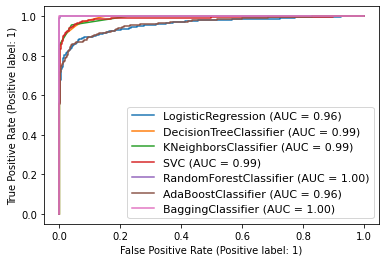

In [351]:
disp=plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(dt,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(adc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(bc,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

ROC CURVE FOR TESTING

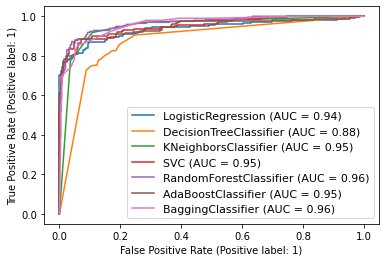

In [352]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(adc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(bc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

CONCLUSION-<BR>
 -----------
SINCE FOR ADABOOST CLASSIFIER THE AUC IS ALMOST SAME FOR BOTH TRAINING AND TESTING AND THE DIFFERENCE BETWEEN THE CROSS VAL SCORE AND THE ACCURACY SCORE IS THE LOWEST WE WILL CHOOSE "RANDOM FOREST CLASSIFIER " AS OUR FINAL MODEL <BR>
Precision and and accuracy scores are also good with comparatively low false positives as compared to other models 

    

In [353]:
score(adc,x_train,x_test,y_train,y_test,train=True)
score(adc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostClassifier(algorithm='SAMME', n_estimators=69, random_state=121) is 90.03


CONFUSION MATRIX FOR THE TRAINIG


 [[910  74]
 [103 688]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.90      0.92      0.91       984
           1       0.90      0.87      0.89       791

    accuracy                           0.90      1775
   macro avg       0.90      0.90      0.90      1775
weighted avg       0.90      0.90      0.90      1775



Testing SCORE FOR THE AdaBoostClassifier(algorithm='SAMME', n_estimators=69, random_state=121) is 90.54


CONFUSION MATRIX FOR THE TESTING


 [[231  18]
 [ 24 171]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.91      0.93      0.92       249
           1       0.90      0.88      0.89       195

    accuracy                           0.91       444
   macro avg       0.91      0.90  

In [354]:
test_pred=rfc.predict(x_test)
rfc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [355]:
cross_val=cross_val_score(rfc,x_scaled,y,cv=5).mean()

In [356]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",rfc_test_accuracy)


CROSS VAL SCORE IS  90.22

TEST ACCURACY SCORE IS  92.12


SAVING THE MODEL
------------------

In [357]:
import pickle

In [358]:
with open('adc_mod', 'wb') as files:
    pickle.dump(adc, files)